In [1]:
!pip install prophet

In [2]:
# Gerekli k√ºt√ºphaneleri import ediyorum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium.plugins import MarkerCluster, HeatMap
from IPython.display import IFrame
from prophet import Prophet
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Veri setini y√ºkl√ºyorum
df = pd.read_csv('/kaggle/input/world-population-by-country-2024/World Population by country 2024.csv')

In [4]:
# ƒ∞lk bir ka√ß satƒ±rƒ± g√∂r√ºnt√ºl√ºyorum
print("ƒ∞lk birka√ß satƒ±r:")
df.head()

ƒ∞lk birka√ß satƒ±r:


Country  Population 2024  Population 2023 Area (km2)  Density (/km2)  \
0          India       1441719852       1428627663         3M           485.0   
1          China       1425178782       1425671352       9.4M           151.0   
2  United States        341814420        339996563       9.1M            37.0   
3      Indonesia        279798049        277534122       1.9M           149.0   
4       Pakistan        245209815        240485658     770.9K           318.0   

   Growth Rate  World %  World Rank  
0       0.0092   0.1801           1  
1      -0.0003   0.1780           2  
2       0.0053   0.0427           3  
3       0.0082   0.0350           4  
4       0.0196   0.0306           5

In [5]:
# Veri seti hakkƒ±nda genel bilgi ediniyorum
print("\nVeri setinin genel bilgileri:")
df.info()


Veri setinin genel bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          234 non-null    object 
 1   Population 2024  234 non-null    int64  
 2   Population 2023  234 non-null    int64  
 3   Area (km2)       234 non-null    object 
 4   Density (/km2)   234 non-null    float64
 5   Growth Rate      234 non-null    float64
 6   World %          228 non-null    float64
 7   World Rank       234 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 14.8+ KB


In [6]:
# Temel istatistikleri g√∂r√ºnt√ºl√ºyorum
print("\nTemel istatistikler:")
df.describe()


Temel istatistikler:


Population 2024  Population 2023  Density (/km2)  Growth Rate  \
count     2.340000e+02     2.340000e+02      234.000000   234.000000   
mean      3.468862e+07     3.437442e+07      453.788248     0.009200   
std       1.380750e+08     1.373864e+08     1990.163274     0.011371   
min       5.260000e+02     5.180000e+02        0.140000    -0.030900   
25%       4.264565e+05     4.225982e+05       39.500000     0.001925   
50%       5.626359e+06     5.643895e+06       98.500000     0.007950   
75%       2.392272e+07     2.324537e+07      248.250000     0.015675   
max       1.441720e+09     1.428628e+09    21674.000000     0.048300   

          World %  World Rank  
count  228.000000  234.000000  
mean     0.004446  117.500000  
std      0.017459   67.694165  
min      0.000000    1.000000  
25%      0.000100   59.250000  
50%      0.000750  117.500000  
75%      0.003000  175.750000  
max      0.180100  234.000000

In [7]:
# Eksik verileri kontrol ediyorum
print("\nEksik verilerin kontrol edilmesi:")
df.isnull().sum()


Eksik verilerin kontrol edilmesi:


Country            0
Population 2024    0
Population 2023    0
Area (km2)         0
Density (/km2)     0
Growth Rate        0
World %            6
World Rank         0
dtype: int64

In [8]:
# Eksik verilerin ortalama ile dolduruyorum
df['World %'].fillna(df['World %'].mean(), inplace=True)

In [9]:
# Eksik verilerin yeniden kontrol ediyorum
print("\nEksik verilerin doldurulmasƒ±ndan sonra kontrol edilmesi:")
print(df.isnull().sum())


Eksik verilerin doldurulmasƒ±ndan sonra kontrol edilmesi:
Country            0
Population 2024    0
Population 2023    0
Area (km2)         0
Density (/km2)     0
Growth Rate        0
World %            0
World Rank         0
dtype: int64


In [10]:
# Veri t√ºrlerini kontrol ediyorum
print("\nVeri t√ºrleri:")
df.dtypes


Veri t√ºrleri:


Country             object
Population 2024      int64
Population 2023      int64
Area (km2)          object
Density (/km2)     float64
Growth Rate        float64
World %            float64
World Rank           int64
dtype: object

In [11]:
# √úlkelerin toplam sayƒ±sƒ±nƒ± inceliyorum
print("\nToplam √ºlke sayƒ±sƒ±:")
df['Country'].nunique()


Toplam √ºlke sayƒ±sƒ±:


234

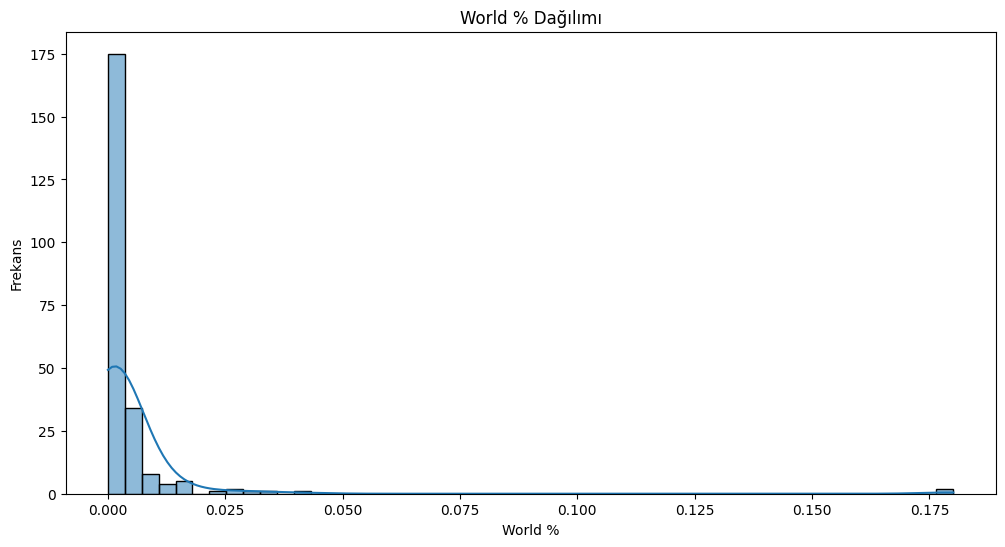

In [12]:
# 'World %' s√ºtununu g√∂rselle≈ütiriyorum
plt.figure(figsize=(12, 6))
sns.histplot(df['World %'], bins=50, kde=True)
plt.title('World % Daƒüƒ±lƒ±mƒ±')
plt.xlabel('World %')
plt.ylabel('Frekans')
plt.show()

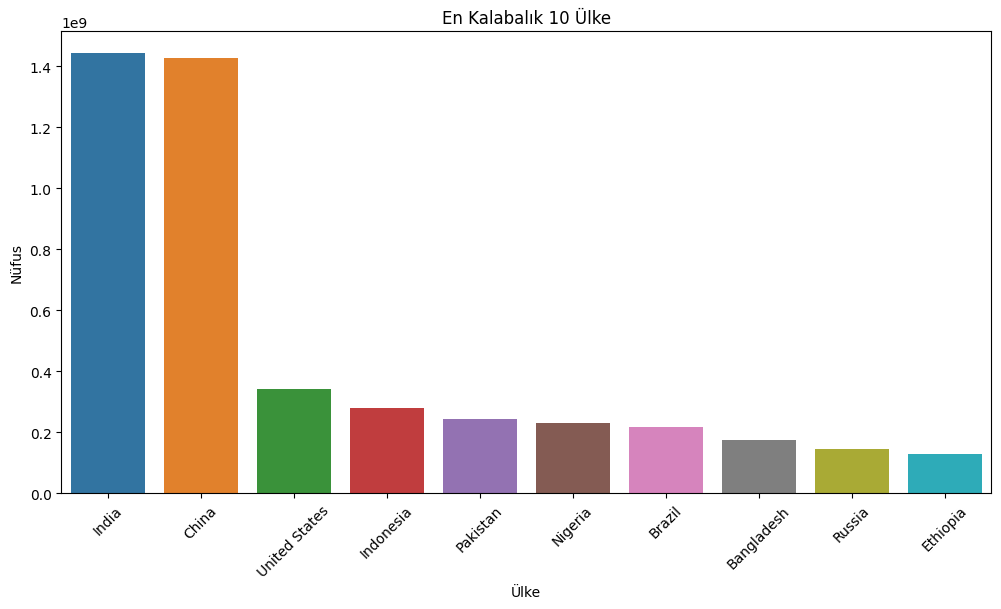

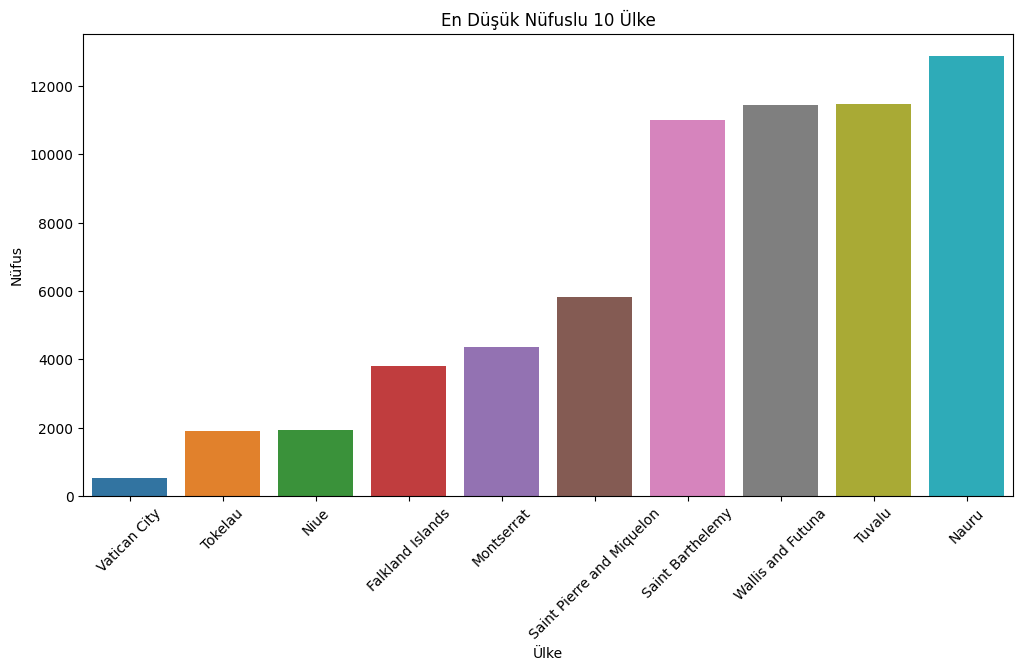

In [13]:
# En kalabalƒ±k 10 √ºlkeyi g√∂rselle≈ütiriyorum
top_10_populous_countries = df.nlargest(10, 'Population 2024')
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Population 2024', data=top_10_populous_countries)
plt.title('En Kalabalƒ±k 10 √úlke')
plt.xlabel('√úlke')
plt.ylabel('N√ºfus')
plt.xticks(rotation=45)
plt.show()

# En d√º≈ü√ºk n√ºfuslu 10 √ºlkeyi g√∂rselle≈ütiriyorum
bottom_10_populous_countries = df.nsmallest(10, 'Population 2024')
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Population 2024', data=bottom_10_populous_countries)
plt.title('En D√º≈ü√ºk N√ºfuslu 10 √úlke')
plt.xlabel('√úlke')
plt.ylabel('N√ºfus')
plt.xticks(rotation=45)
plt.show()

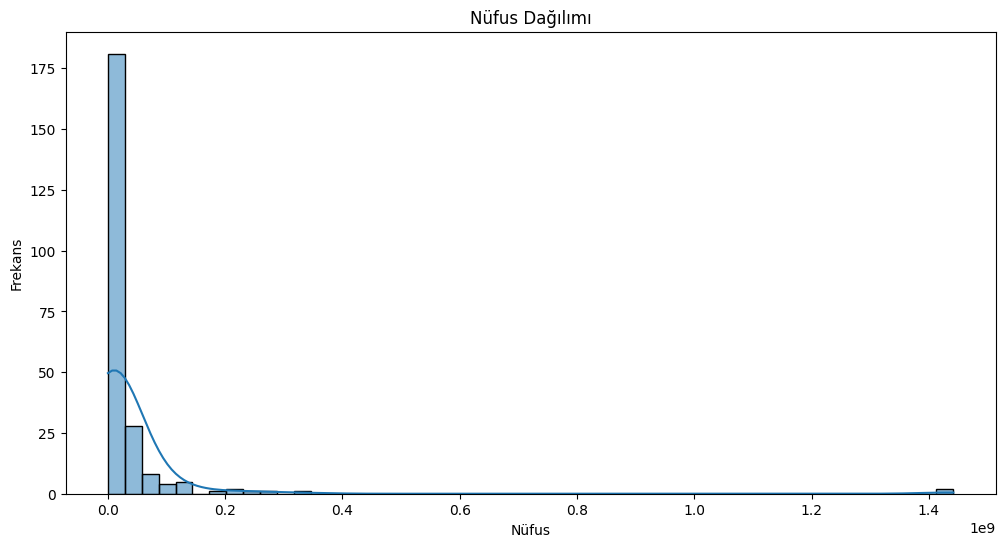

In [14]:
# N√ºfus daƒüƒ±lƒ±mƒ±nƒ± g√∂rselle≈ütiriyorum
plt.figure(figsize=(12, 6))
sns.histplot(df['Population 2024'], bins=50, kde=True)
plt.title('N√ºfus Daƒüƒ±lƒ±mƒ±')
plt.xlabel('N√ºfus')
plt.ylabel('Frekans')
plt.show()

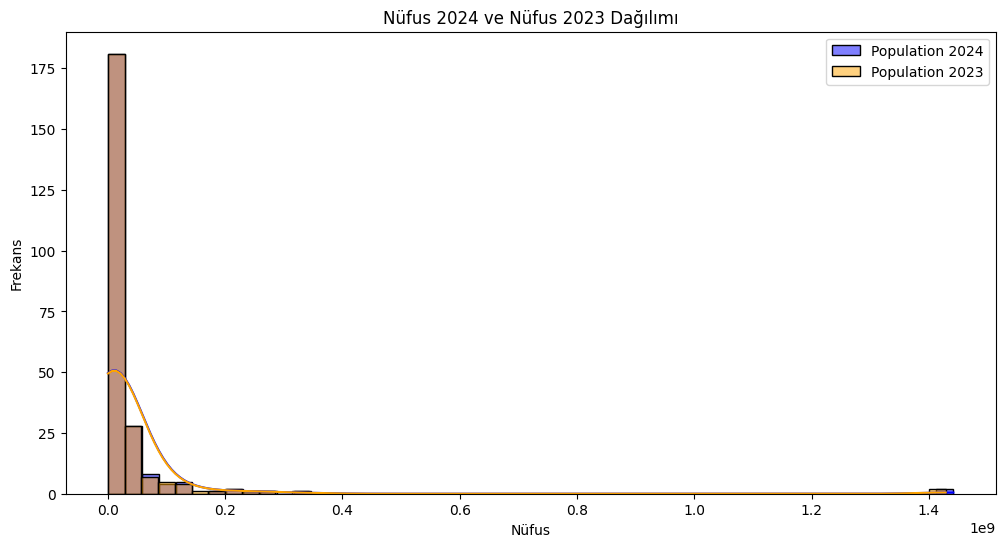

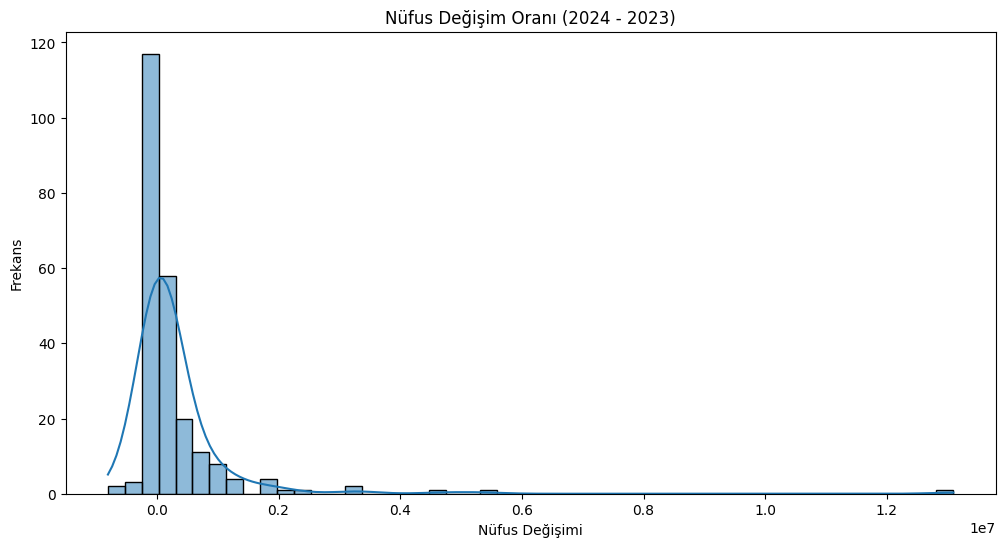

In [15]:
# N√ºfus 2024 ve N√ºfus 2023 daƒüƒ±lƒ±mƒ±nƒ± g√∂rselle≈ütiriyorum
plt.figure(figsize=(12, 6))
sns.histplot(df['Population 2024'], bins=50, kde=True, label='Population 2024', color='blue')
sns.histplot(df['Population 2023'], bins=50, kde=True, label='Population 2023', color='orange')
plt.title('N√ºfus 2024 ve N√ºfus 2023 Daƒüƒ±lƒ±mƒ±')
plt.xlabel('N√ºfus')
plt.ylabel('Frekans')
plt.legend()
plt.show()

# N√ºfus deƒüi≈üim oranƒ± (2024 - 2023)
df['Population Change'] = df['Population 2024'] - df['Population 2023']
plt.figure(figsize=(12, 6))
sns.histplot(df['Population Change'], bins=50, kde=True)
plt.title('N√ºfus Deƒüi≈üim Oranƒ± (2024 - 2023)')
plt.xlabel('N√ºfus Deƒüi≈üimi')
plt.ylabel('Frekans')
plt.show()

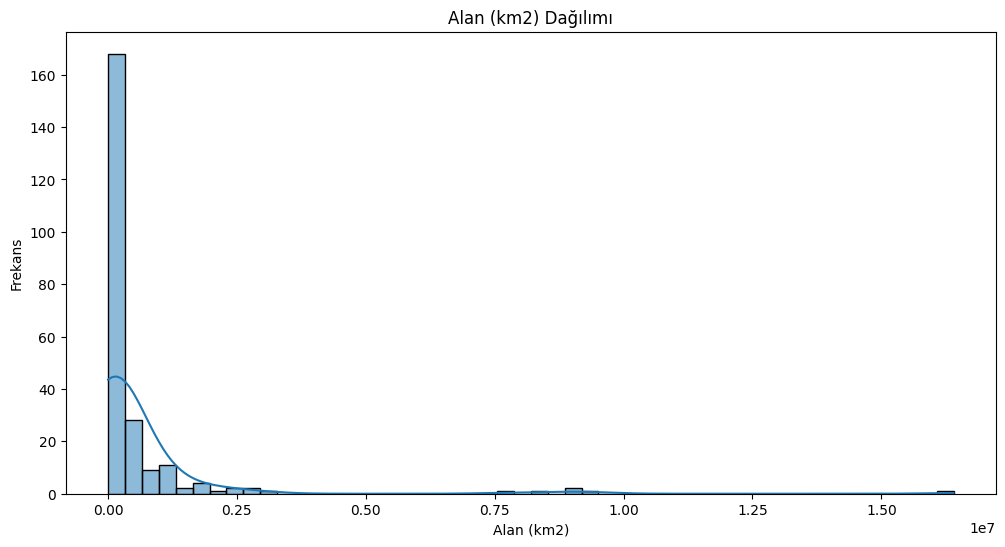

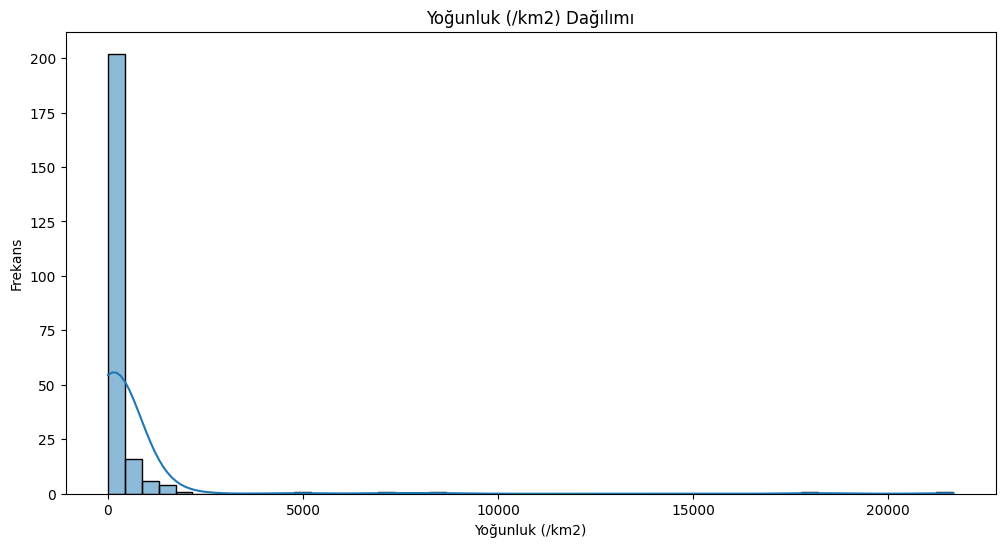

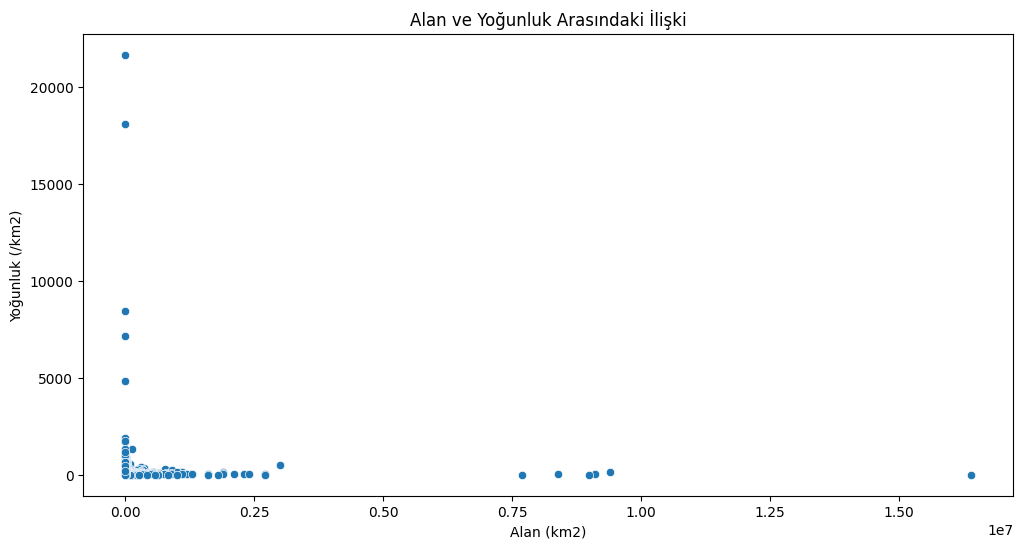

In [16]:
# Alan (km2) s√ºtunundaki verileri sayƒ±sal hale getiriyorum
def convert_area(area):
    area = area.strip()
    if '<' in area:
        return 1.0  # '< 1' gibi deƒüerler i√ßin 1.0 olarak kabul edelim
    elif 'M' in area:
        return float(area.replace('M', '').replace(',', '').strip()) * 1e6
    elif 'K' in area:
        return float(area.replace('K', '').replace(',', '').strip()) * 1e3
    else:
        return float(area.replace(',', '').strip())

df['Area (km2)'] = df['Area (km2)'].apply(convert_area)

# Alan (km2) daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(12, 6))
sns.histplot(df['Area (km2)'], bins=50, kde=True)
plt.title('Alan (km2) Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Alan (km2)')
plt.ylabel('Frekans')
plt.show()

# Yoƒüunluk (/km2) daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(12, 6))
sns.histplot(df['Density (/km2)'], bins=50, kde=True)
plt.title('Yoƒüunluk (/km2) Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Yoƒüunluk (/km2)')
plt.ylabel('Frekans')
plt.show()

# Alan ve Yoƒüunluk arasƒ±ndaki ili≈üki
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Area (km2)', y='Density (/km2)', data=df)
plt.title('Alan ve Yoƒüunluk Arasƒ±ndaki ƒ∞li≈üki')
plt.xlabel('Alan (km2)')
plt.ylabel('Yoƒüunluk (/km2)')
plt.show()

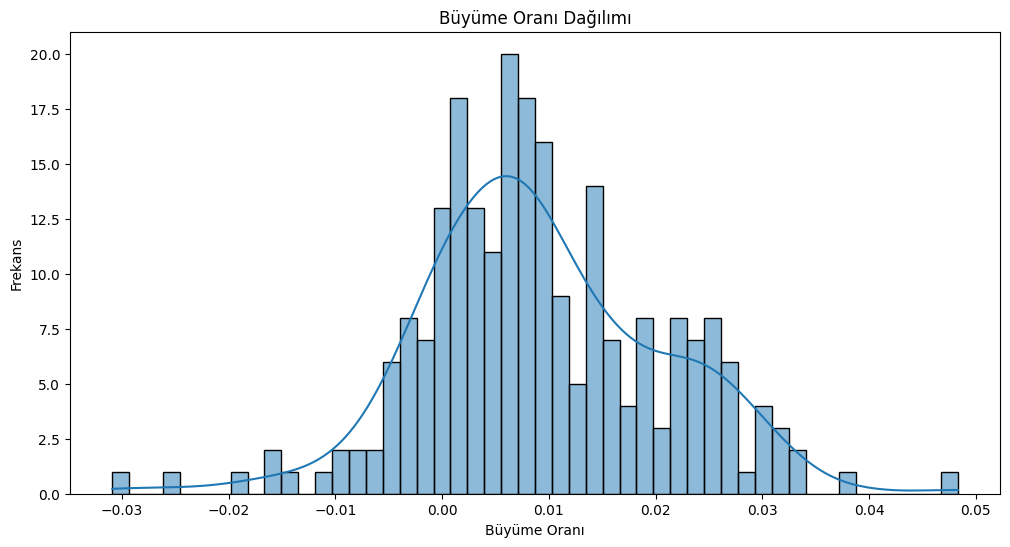

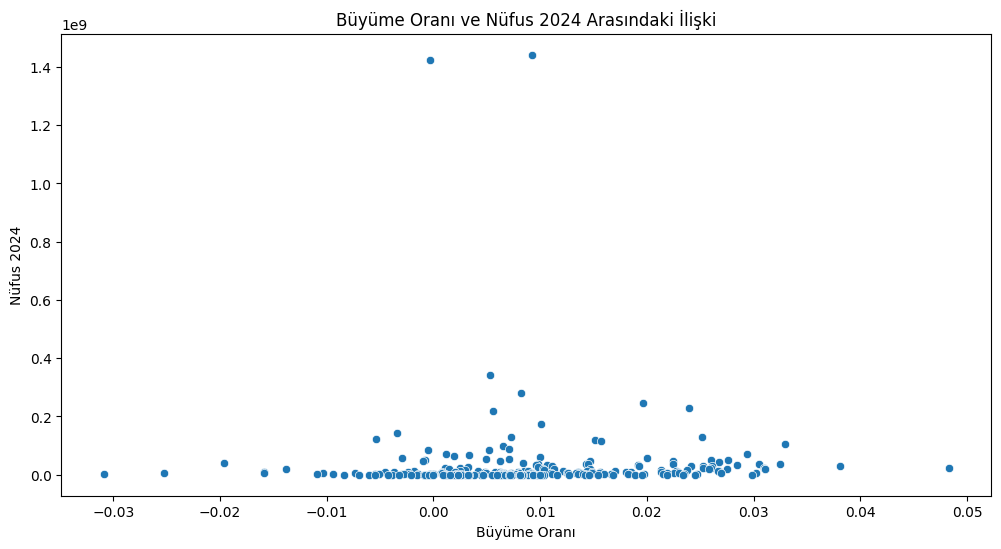

In [17]:
# B√ºy√ºme Oranƒ± daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(12, 6))
sns.histplot(df['Growth Rate'], bins=50, kde=True)
plt.title('B√ºy√ºme Oranƒ± Daƒüƒ±lƒ±mƒ±')
plt.xlabel('B√ºy√ºme Oranƒ±')
plt.ylabel('Frekans')
plt.show()

# B√ºy√ºme Oranƒ± ve N√ºfus 2024 arasƒ±ndaki ili≈üki
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Growth Rate', y='Population 2024', data=df)
plt.title('B√ºy√ºme Oranƒ± ve N√ºfus 2024 Arasƒ±ndaki ƒ∞li≈üki')
plt.xlabel('B√ºy√ºme Oranƒ±')
plt.ylabel('N√ºfus 2024')
plt.show()

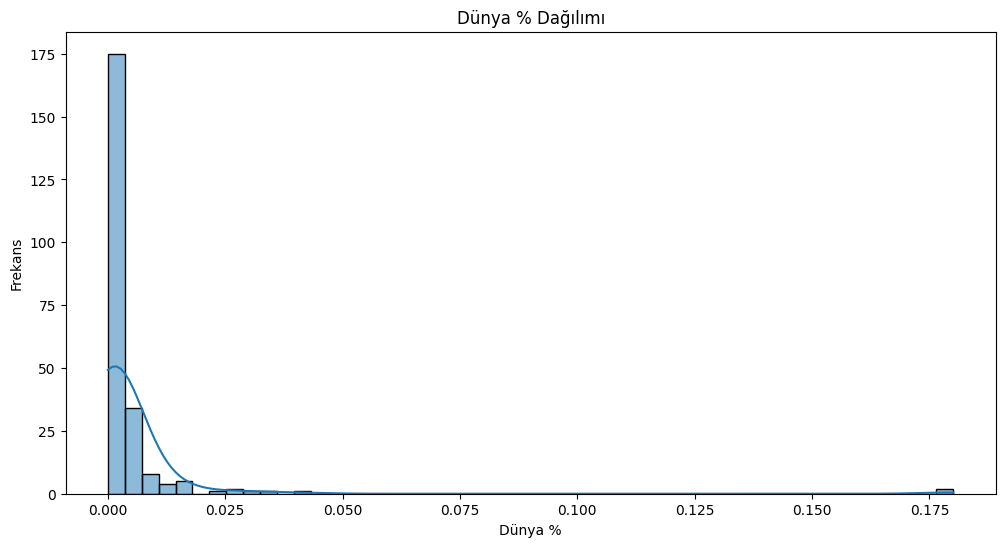

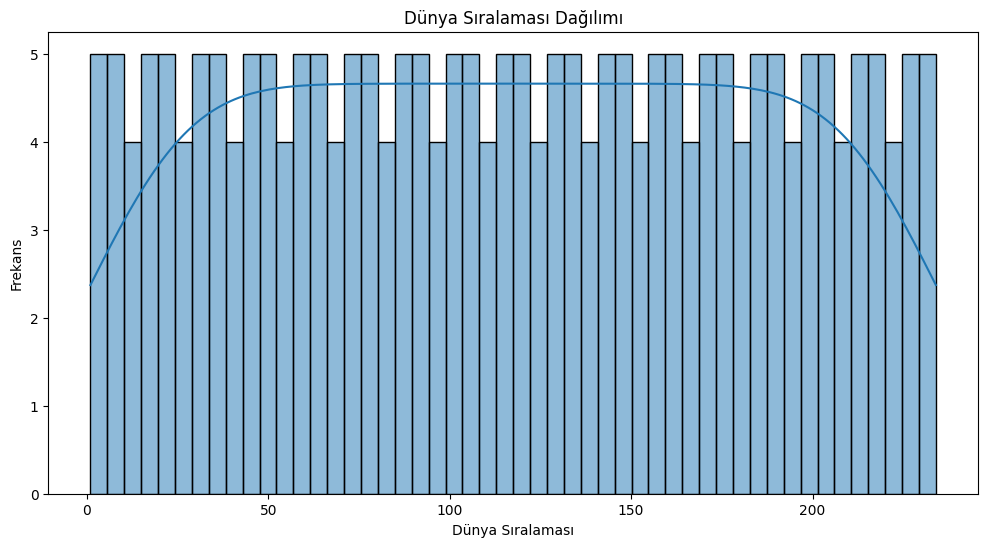

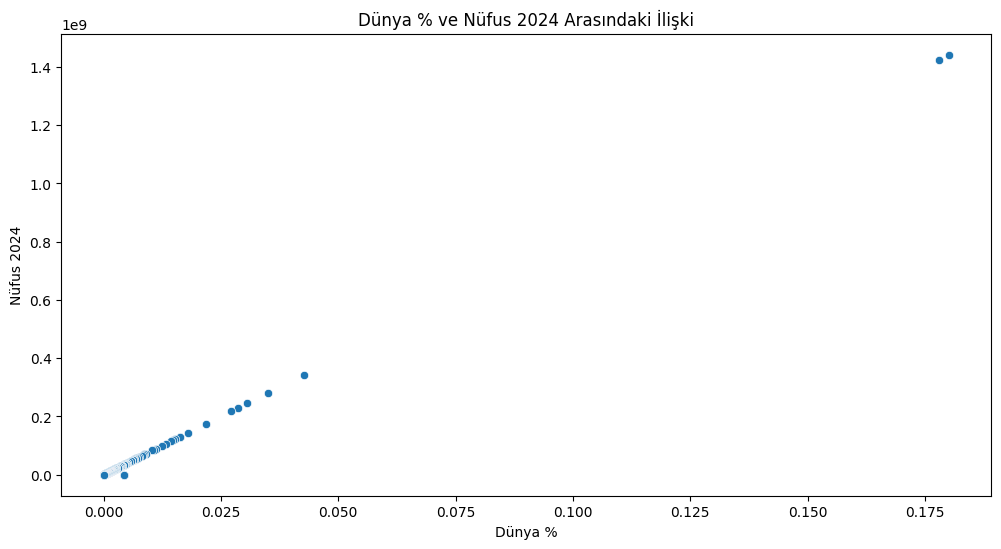

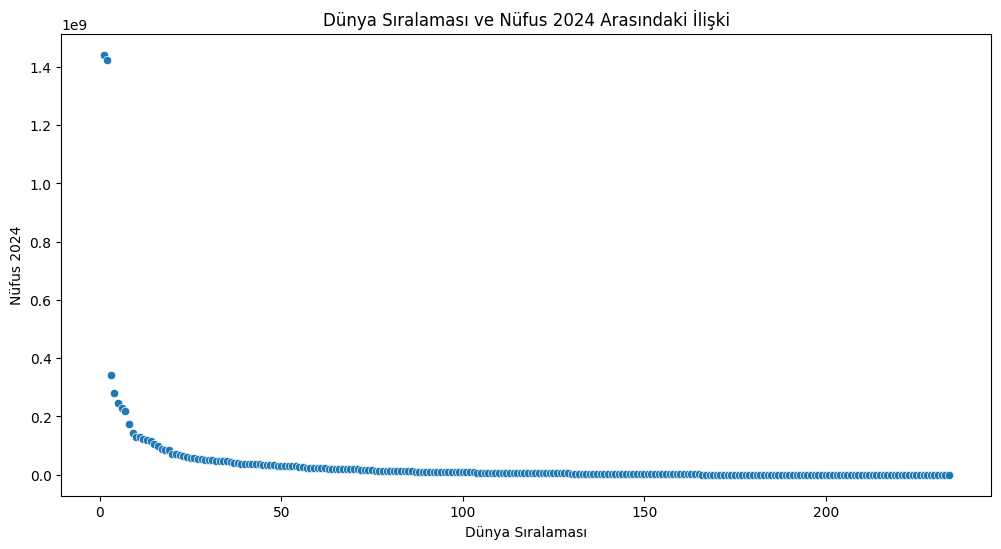

In [18]:
# D√ºnya % daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(12, 6))
sns.histplot(df['World %'], bins=50, kde=True)
plt.title('D√ºnya % Daƒüƒ±lƒ±mƒ±')
plt.xlabel('D√ºnya %')
plt.ylabel('Frekans')
plt.show()

# D√ºnya Sƒ±ralamasƒ± daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(12, 6))
sns.histplot(df['World Rank'], bins=50, kde=True)
plt.title('D√ºnya Sƒ±ralamasƒ± Daƒüƒ±lƒ±mƒ±')
plt.xlabel('D√ºnya Sƒ±ralamasƒ±')
plt.ylabel('Frekans')
plt.show()

# D√ºnya % ve N√ºfus 2024 arasƒ±ndaki ili≈üki
plt.figure(figsize=(12, 6))
sns.scatterplot(x='World %', y='Population 2024', data=df)
plt.title('D√ºnya % ve N√ºfus 2024 Arasƒ±ndaki ƒ∞li≈üki')
plt.xlabel('D√ºnya %')
plt.ylabel('N√ºfus 2024')
plt.show()

# D√ºnya Sƒ±ralamasƒ± ve N√ºfus 2024 arasƒ±ndaki ili≈üki
plt.figure(figsize=(12, 6))
sns.scatterplot(x='World Rank', y='Population 2024', data=df)
plt.title('D√ºnya Sƒ±ralamasƒ± ve N√ºfus 2024 Arasƒ±ndaki ƒ∞li≈üki')
plt.xlabel('D√ºnya Sƒ±ralamasƒ±')
plt.ylabel('N√ºfus 2024')
plt.show()

In [19]:
# Koordinat veri setini y√ºkl√ºyorum
coords_df = pd.read_csv('/kaggle/input/country-coordinates-world/country-coordinates-world.csv')

In [20]:
# ƒ∞lk birka√ß satƒ±rƒ± g√∂r√ºnt√ºl√ºyorum
print(coords_df.head())

    latitude   longitude         Country
0  33.939110   67.709953     Afghanistan
1  41.153332   20.168331         Albania
2  28.033886    1.659626         Algeria
3 -14.270972 -170.132217  American Samoa
4  42.546245    1.601554         Andorra


In [21]:
# Mevcut veri seti ile koordinat veri setini birle≈ütiriyorum
df = df.merge(coords_df, how='left', left_on='Country', right_on='Country')

In [22]:
# Gerekli s√ºtunlarƒ± se√ßip ve yeniden adlandƒ±rƒ±yorum
df = df[['Country', 'Population 2024', 'Population 2023', 'Area (km2)', 'Density (/km2)', 'Growth Rate', 'World %', 'World Rank', 'latitude', 'longitude']]
df.rename(columns={'latitude': 'Latitude', 'longitude': 'Longitude'}, inplace=True)

In [23]:
# ƒ∞lk birka√ß satƒ±rƒ± tekrar g√∂r√ºnt√ºl√ºyorum
print(df.head())

         Country  Population 2024  Population 2023  Area (km2)  \
0          India       1441719852       1428627663   3000000.0   
1          China       1425178782       1425671352   9400000.0   
2  United States        341814420        339996563   9100000.0   
3      Indonesia        279798049        277534122   1900000.0   
4       Pakistan        245209815        240485658    770900.0   

   Density (/km2)  Growth Rate  World %  World Rank   Latitude   Longitude  
0           485.0       0.0092   0.1801           1  20.593684   78.962880  
1           151.0      -0.0003   0.1780           2  35.861660  104.195397  
2            37.0       0.0053   0.0427           3        NaN         NaN  
3           149.0       0.0082   0.0350           4  -0.789275  113.921327  
4           318.0       0.0196   0.0306           5  30.375321   69.345116  


In [24]:
# Haritayƒ± olu≈üturuyorum
m = folium.Map(location=[20, 0], zoom_start=2)

# MarkerCluster olu≈üturuyorum
marker_cluster = MarkerCluster().add_to(m)

# N√ºfus verilerini MarkerCluster'a ekliyorum
for _, row in df.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=row['Population 2024'] / 1e7,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            popup=folium.Popup(f"{row['Country']}: {row['Population 2024']:,}"),
        ).add_to(marker_cluster)

# Isƒ± haritasƒ± ekliyorum
heat_data = [[row['Latitude'], row['Longitude'], row['Population 2024']] for _, row in df.iterrows() if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude'])]
HeatMap(heat_data, radius=15).add_to(m)

# Harita √ºzerine √ße≈üitli katmanlar ekliyorum
folium.TileLayer('Stamen Terrain', attr='Map tiles by Stamen Design, CC BY 3.0 ‚Äî Map data ¬© OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Toner', attr='Map tiles by Stamen Design, CC BY 3.0 ‚Äî Map data ¬© OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Watercolor', attr='Map tiles by Stamen Design, CC BY 3.0 ‚Äî Map data ¬© OpenStreetMap').add_to(m)
folium.TileLayer('cartodbpositron', attr='Map tiles by CartoDB, under CC BY 3.0. Data by OpenStreetMap, under ODbL.').add_to(m)
folium.TileLayer('cartodbdark_matter', attr='Map tiles by CartoDB, under CC BY 3.0. Data by OpenStreetMap, under ODbL.').add_to(m)

# Katman kontrol√º ekliyorum
folium.LayerControl().add_to(m)

# Haritayƒ± kaydediyorum
m.save('world_population_density_advanced.html')

In [25]:
# Haritayƒ± notebook i√ßinde g√∂r√ºnt√ºl√ºyorum
IFrame('world_population_density_advanced.html', width=800, height=600)

N√ºfus ve Alan arasƒ±ndaki korelasyon: 0.45212820462996056


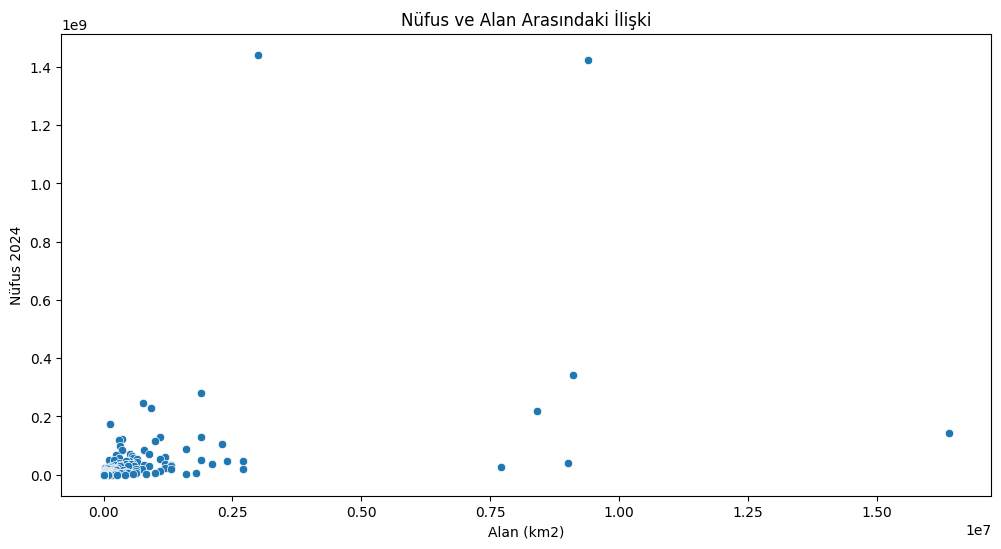

In [26]:
# N√ºfus ve Alan arasƒ±ndaki korelasyonu hesaplƒ±yorum
correlation = df['Population 2024'].corr(df['Area (km2)'])
print(f"N√ºfus ve Alan arasƒ±ndaki korelasyon: {correlation}")

# N√ºfus ve Alan arasƒ±ndaki ili≈ükiyi scatter plot ile g√∂steriyorum
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Area (km2)', y='Population 2024', data=df)
plt.title('N√ºfus ve Alan Arasƒ±ndaki ƒ∞li≈üki')
plt.xlabel('Alan (km2)')
plt.ylabel('N√ºfus 2024')
plt.show()

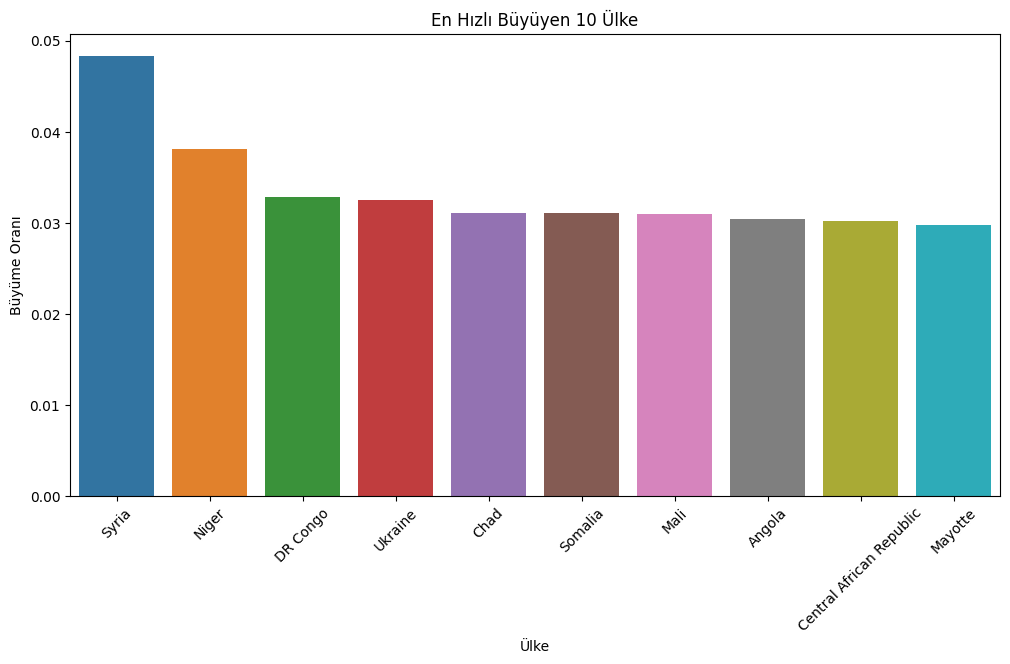

In [27]:
# En hƒ±zlƒ± b√ºy√ºyen 10 √ºlke
top_10_fastest_growing = df.nlargest(10, 'Growth Rate')
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Growth Rate', data=top_10_fastest_growing)
plt.title('En Hƒ±zlƒ± B√ºy√ºyen 10 √úlke')
plt.xlabel('√úlke')
plt.ylabel('B√ºy√ºme Oranƒ±')
plt.xticks(rotation=45)
plt.show()

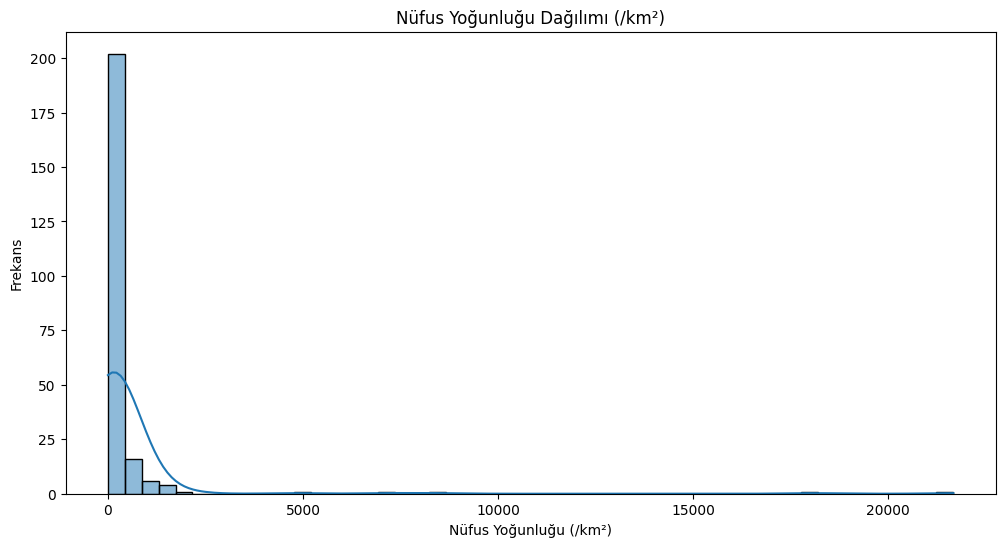

In [28]:
# N√ºfus Yoƒüunluƒüu daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(12, 6))
sns.histplot(df['Density (/km2)'], bins=50, kde=True)
plt.title('N√ºfus Yoƒüunluƒüu Daƒüƒ±lƒ±mƒ± (/km¬≤)')
plt.xlabel('N√ºfus Yoƒüunluƒüu (/km¬≤)')
plt.ylabel('Frekans')
plt.show()

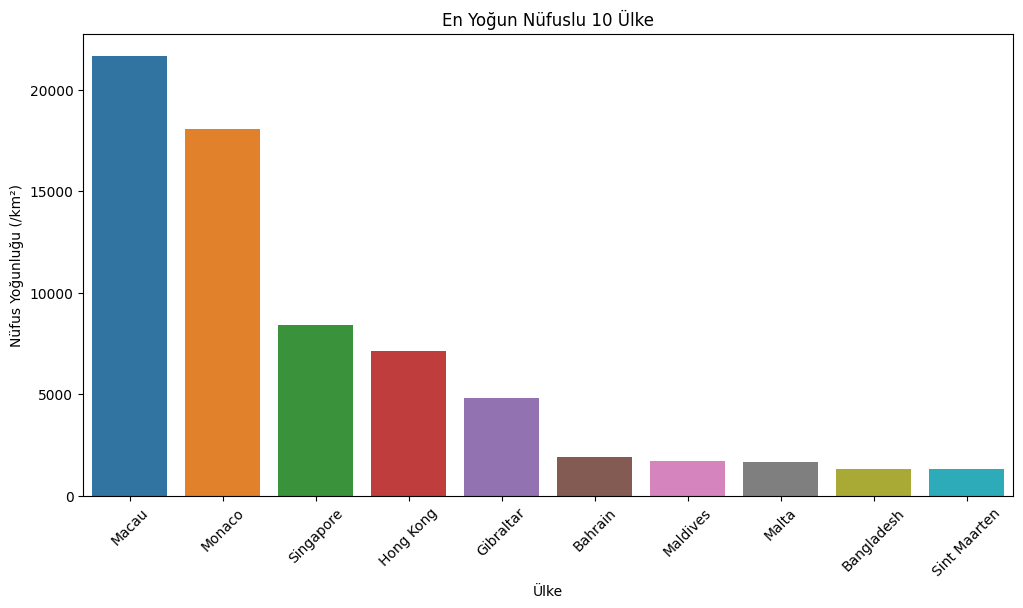

In [29]:
# En yoƒüun n√ºfuslu 10 √ºlke
top_10_dense_countries = df.nlargest(10, 'Density (/km2)')
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Density (/km2)', data=top_10_dense_countries)
plt.title('En Yoƒüun N√ºfuslu 10 √úlke')
plt.xlabel('√úlke')
plt.ylabel('N√ºfus Yoƒüunluƒüu (/km¬≤)')
plt.xticks(rotation=45)
plt.show()

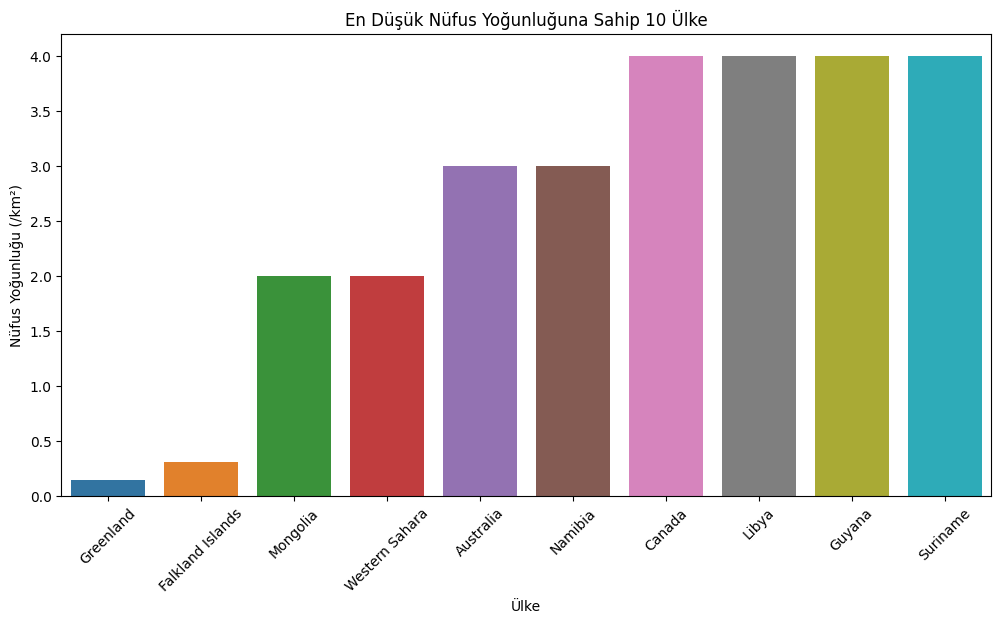

In [30]:
# En d√º≈ü√ºk n√ºfus yoƒüunluƒüuna sahip 10 √ºlke
bottom_10_dense_countries = df.nsmallest(10, 'Density (/km2)')
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Density (/km2)', data=bottom_10_dense_countries)
plt.title('En D√º≈ü√ºk N√ºfus Yoƒüunluƒüuna Sahip 10 √úlke')
plt.xlabel('√úlke')
plt.ylabel('N√ºfus Yoƒüunluƒüu (/km¬≤)')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Mevcut veri seti
data = {
    'Country': ['India', 'China', 'United States', 'Indonesia', 'Pakistan', 'Turkey'],
    'Population 2024': [1441719852, 1425178782, 341814420, 279798049, 245209815, 88510876],
    'Population 2023': [1428627663, 1425671352, 339996563, 277534122, 240485658, 87590708],
    'Area (km2)': [3000000.0, 9400000.0, 9100000.0, 1900000.0, 770900.0, 783562],
    'Density (/km2)': [485.0, 151.0, 37.0, 149.0, 318.0, 113.0],
    'Growth Rate': [0.0092, -0.0003, 0.0053, 0.0082, 0.0196, 0.0105],
    'World %': [0.1801, 0.1780, 0.0427, 0.0350, 0.0306, 0.0112],
    'World Rank': [1, 2, 3, 4, 5, 19],
    'Latitude': [20.593684, 35.861660, 37.09024, -0.789275, 30.375321, 38.963745],
    'Longitude': [78.962880, 104.195397, -95.712891, 113.921327, 69.345116, 35.243322]
}

df = pd.DataFrame(data)

In [32]:
# Her √ºlke i√ßin ge√ßmi≈ü n√ºfus verilerini olu≈üturuyorum
historical_data = []
for index, row in df.iterrows():
    for year in range(2000, 2025, 5):
        historical_data.append({
            'Country': row['Country'],
            'Year': year,
            'Population': int(row['Population 2023'] * (1 + row['Growth Rate'] * (year - 2023)))
        })

df_historical = pd.DataFrame(historical_data)

In [33]:
# Prophet modeli i√ßin veri setini hazƒ±rlƒ±yorum
df_prophet = df_historical.rename(columns={'Year': 'ds', 'Population': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

In [34]:
# Prophet modelini olu≈üturma ve tahmin yapma
forecast_list = []
for country in df_prophet['Country'].unique():
    df_country = df_prophet[df_prophet['Country'] == country]
    model = Prophet()  # Her d√∂ng√ºde yeni bir Prophet nesnesi olu≈üturuyorum
    model.fit(df_country)
    future = model.make_future_dataframe(periods=10, freq='Y')
    forecast = model.predict(future)
    forecast['Country'] = country
    forecast_list.append(forecast)

forecast_all = pd.concat(forecast_list)

# Gelecekte en y√ºksek n√ºfusa sahip √ºlkeyi belirliyorum
future_year = forecast_all['ds'].max().year
max_population_country = forecast_all[forecast_all['ds'].dt.year == future_year].sort_values('yhat', ascending=False).iloc[0]

print(f"Gelecekte en y√ºksek n√ºfusa sahip √ºlke: {max_population_country['Country']}")
print(f"N√ºfusu: {int(max_population_country['yhat'])}")

14:40:40 - cmdstanpy - INFO - Chain [1] start processing
14:40:40 - cmdstanpy - INFO - Chain [1] done processing
14:40:41 - cmdstanpy - INFO - Chain [1] start processing
14:40:41 - cmdstanpy - INFO - Chain [1] done processing
14:40:42 - cmdstanpy - INFO - Chain [1] start processing
14:40:42 - cmdstanpy - INFO - Chain [1] done processing
14:40:43 - cmdstanpy - INFO - Chain [1] start processing
14:40:43 - cmdstanpy - INFO - Chain [1] done processing
14:40:43 - cmdstanpy - INFO - Chain [1] start processing
14:40:43 - cmdstanpy - INFO - Chain [1] done processing
14:40:44 - cmdstanpy - INFO - Chain [1] start processing
14:40:46 - cmdstanpy - INFO - Chain [1] done processing


Gelecekte en y√ºksek n√ºfusa sahip √ºlke: India
N√ºfusu: 1475407199


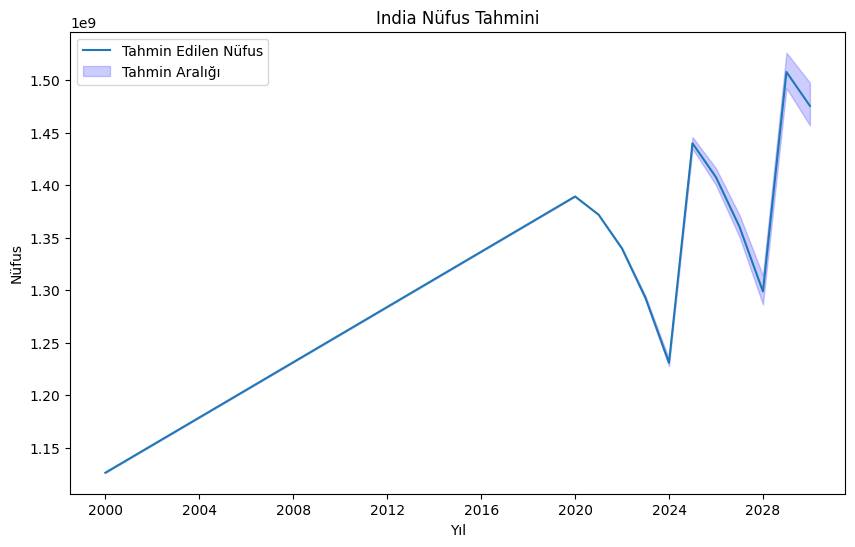

In [35]:
# En y√ºksek n√ºfusa sahip √ºlkenin tahminlerini g√∂rselle≈ütiriyorum
country_to_plot = max_population_country['Country']
forecast_to_plot = forecast_all[forecast_all['Country'] == country_to_plot]

plt.figure(figsize=(10, 6))
plt.plot(forecast_to_plot['ds'], forecast_to_plot['yhat'], label='Tahmin Edilen N√ºfus')
plt.fill_between(forecast_to_plot['ds'], forecast_to_plot['yhat_lower'], forecast_to_plot['yhat_upper'], color='blue', alpha=0.2, label='Tahmin Aralƒ±ƒüƒ±')
plt.title(f'{country_to_plot} N√ºfus Tahmini')
plt.xlabel('Yƒ±l')
plt.ylabel('N√ºfus')
plt.legend()
plt.show()

In [36]:
# Prophet modelinden elde edilen n√ºfus tahminin √∂zetini inceliyorum
summary_india = forecast_all[forecast_all['Country'] == 'India'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']].describe()
print("Hindistan'ƒ±n N√ºfus Tahminlerinin √ñzeti:")
print(summary_india)

Hindistan'ƒ±n N√ºfus Tahminlerinin √ñzeti:
                        ds          yhat    yhat_lower    yhat_upper
count                   15  1.500000e+01  1.500000e+01  1.500000e+01
mean   2020-05-01 11:12:00  1.334243e+09  1.329326e+09  1.340113e+09
min    2000-01-01 00:00:00  1.126335e+09  1.126335e+09  1.126335e+09
25%    2017-07-02 00:00:00  1.275172e+09  1.272126e+09  1.276196e+09
50%    2022-12-31 00:00:00  1.339619e+09  1.339274e+09  1.340391e+09
75%    2026-07-01 12:00:00  1.398358e+09  1.394607e+09  1.402643e+09
max    2029-12-31 00:00:00  1.507681e+09  1.492286e+09  1.525994e+09
std                    NaN  1.051287e+08  1.012928e+08  1.099210e+08


In [37]:
# Mevcut ve tahmin edilen deƒüerleri kar≈üƒ±la≈ütƒ±rƒ±yorum
comparison_india = df_prophet[df_prophet['Country'] == 'India'].copy()
forecast_india = forecast_all[forecast_all['Country'] == 'India']

# Forecast sonu√ßlarƒ±nƒ±n mevcut veri setine g√∂re yeniden indeksliyorum
forecast_india.set_index('ds', inplace=True)
comparison_india.set_index('ds', inplace=True)

# Tahmin sonu√ßlarƒ±nƒ± mevcut veri setine ekliyorum
comparison_india['yhat'] = forecast_india['yhat']
comparison_india['yhat_lower'] = forecast_india['yhat_lower']
comparison_india['yhat_upper'] = forecast_india['yhat_upper']

print("\nMevcut ve Tahmin Edilen Deƒüerlerin Kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±:")
print(comparison_india)


Mevcut ve Tahmin Edilen Deƒüerlerin Kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±:
           Country           y          yhat    yhat_lower    yhat_upper
ds                                                                      
2000-01-01   India  1126330049  1.126335e+09  1.126335e+09  1.126335e+09
2005-01-01   India  1192046922  1.192052e+09  1.192052e+09  1.192052e+09
2010-01-01   India  1257763794  1.257769e+09  1.257769e+09  1.257769e+09
2015-01-01   India  1323480667  1.323485e+09  1.323485e+09  1.323485e+09
2020-01-01   India  1389197539  1.389202e+09  1.389202e+09  1.389202e+09


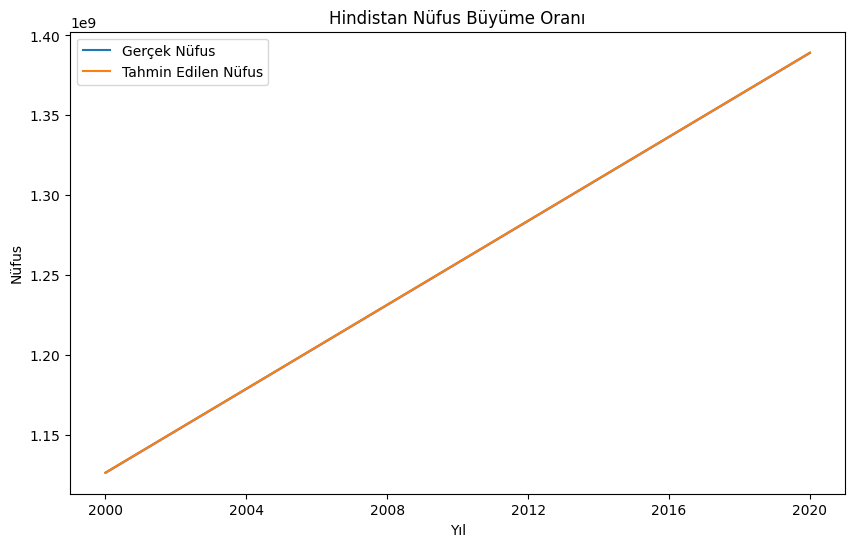

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(comparison_india.index, comparison_india['y'], label='Ger√ßek N√ºfus')
plt.plot(comparison_india.index, comparison_india['yhat'], label='Tahmin Edilen N√ºfus')
plt.fill_between(comparison_india.index, comparison_india['yhat_lower'], comparison_india['yhat_upper'], color='blue', alpha=0.2)
plt.title('Hindistan N√ºfus B√ºy√ºme Oranƒ±')
plt.xlabel('Yƒ±l')
plt.ylabel('N√ºfus')
plt.legend()
plt.show()

In [39]:
# Prophet modelini olu≈üturup tahmin yapƒ±yorum
forecast_list = []
for country in df_prophet['Country'].unique():
    df_country = df_prophet[df_prophet['Country'] == country]
    model = Prophet()  # Her d√∂ng√ºde yeni bir Prophet nesnesi olu≈üturuyorum
    model.fit(df_country)
    future = model.make_future_dataframe(periods=10, freq='Y')
    forecast = model.predict(future)
    forecast['Country'] = country
    forecast_list.append(forecast)

forecast_all = pd.concat(forecast_list)

# Gelecekte en az n√ºfusa sahip √ºlkeyi belirliyorum
future_year = forecast_all['ds'].max().year
min_population_country = forecast_all[forecast_all['ds'].dt.year == future_year].sort_values('yhat', ascending=True).iloc[0]

print(f"Gelecekte en az n√ºfusa sahip √ºlke: {min_population_country['Country']}")
print(f"N√ºfusu: {int(min_population_country['yhat'])}")

14:40:48 - cmdstanpy - INFO - Chain [1] start processing
14:40:48 - cmdstanpy - INFO - Chain [1] done processing
14:40:49 - cmdstanpy - INFO - Chain [1] start processing
14:40:49 - cmdstanpy - INFO - Chain [1] done processing
14:40:49 - cmdstanpy - INFO - Chain [1] start processing
14:40:50 - cmdstanpy - INFO - Chain [1] done processing
14:40:51 - cmdstanpy - INFO - Chain [1] start processing
14:40:51 - cmdstanpy - INFO - Chain [1] done processing
14:40:51 - cmdstanpy - INFO - Chain [1] start processing
14:40:51 - cmdstanpy - INFO - Chain [1] done processing
14:40:52 - cmdstanpy - INFO - Chain [1] start processing
14:40:54 - cmdstanpy - INFO - Chain [1] done processing


Gelecekte en az n√ºfusa sahip √ºlke: Turkey
N√ºfusu: 93953242


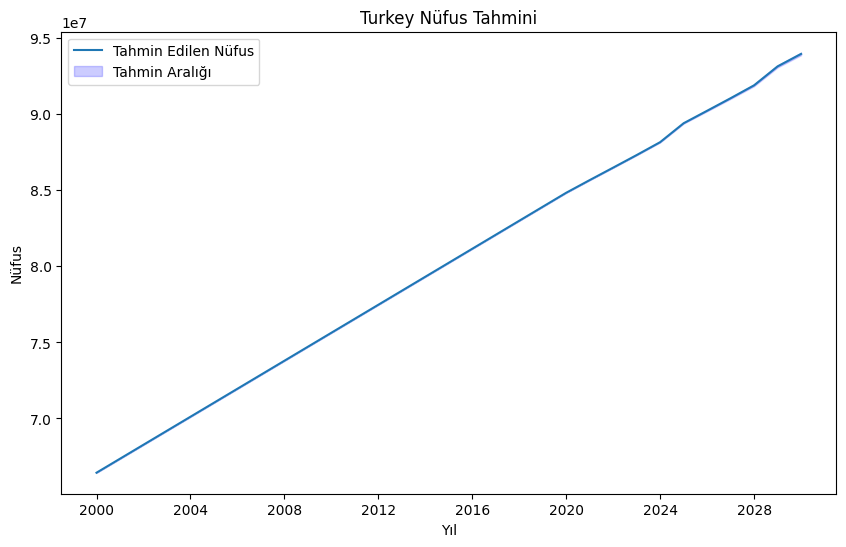

In [40]:
# En az n√ºfusa sahip √ºlkenin tahminlerini g√∂rselle≈ütiriyorum
country_to_plot = min_population_country['Country']
forecast_to_plot = forecast_all[forecast_all['Country'] == country_to_plot]

plt.figure(figsize=(10, 6))
plt.plot(forecast_to_plot['ds'], forecast_to_plot['yhat'], label='Tahmin Edilen N√ºfus')
plt.fill_between(forecast_to_plot['ds'], forecast_to_plot['yhat_lower'], forecast_to_plot['yhat_upper'], color='blue', alpha=0.2, label='Tahmin Aralƒ±ƒüƒ±')
plt.title(f'{country_to_plot} N√ºfus Tahmini')
plt.xlabel('Yƒ±l')
plt.ylabel('N√ºfus')
plt.legend()
plt.show()

In [41]:
# Mevcut ve tahmin edilen deƒüerleri kar≈üƒ±la≈ütƒ±rƒ±yorum
comparison_min_country = df_prophet[df_prophet['Country'] == country_to_plot].copy()
forecast_min_country = forecast_all[forecast_all['Country'] == country_to_plot]

# Forecast sonu√ßlarƒ±nƒ±n mevcut veri setine g√∂re yeniden indeksliyorum
forecast_min_country.set_index('ds', inplace=True)
comparison_min_country.set_index('ds', inplace=True)

# Tahmin sonu√ßlarƒ±nƒ± mevcut veri setine ekliyorum
comparison_min_country['yhat'] = forecast_min_country['yhat']
comparison_min_country['yhat_lower'] = forecast_min_country['yhat_lower']
comparison_min_country['yhat_upper'] = forecast_min_country['yhat_upper']

print("\nMevcut ve Tahmin Edilen Deƒüerlerin Kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±:")
print(comparison_min_country)


Mevcut ve Tahmin Edilen Deƒüerlerin Kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±:
           Country         y          yhat    yhat_lower    yhat_upper
ds                                                                    
2000-01-01  Turkey  66437552  6.643738e+07  6.643738e+07  6.643738e+07
2005-01-01  Turkey  71036064  7.103603e+07  7.103603e+07  7.103603e+07
2010-01-01  Turkey  75634576  7.563449e+07  7.563449e+07  7.563449e+07
2015-01-01  Turkey  80233088  8.023295e+07  8.023295e+07  8.023295e+07
2020-01-01  Turkey  84831600  8.483141e+07  8.483141e+07  8.483141e+07


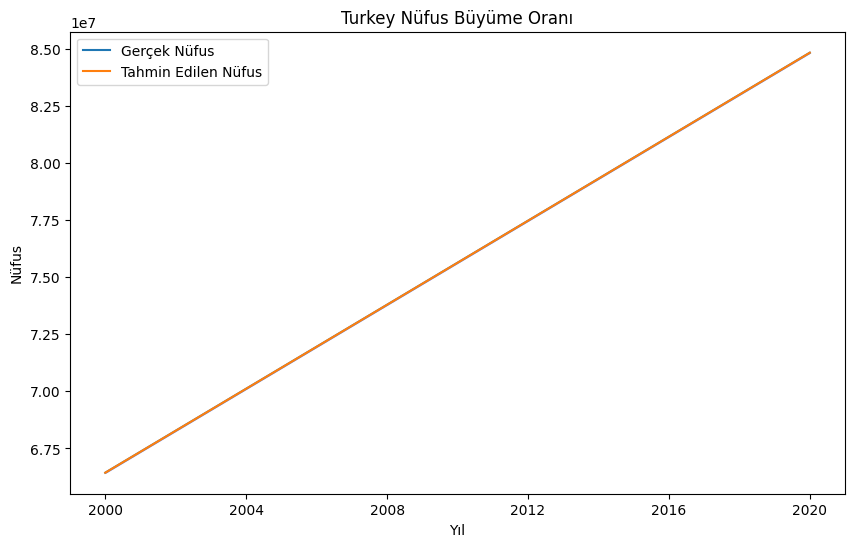

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(comparison_min_country.index, comparison_min_country['y'], label='Ger√ßek N√ºfus')
plt.plot(comparison_min_country.index, comparison_min_country['yhat'], label='Tahmin Edilen N√ºfus')
plt.fill_between(comparison_min_country.index, comparison_min_country['yhat_lower'], comparison_min_country['yhat_upper'], color='blue', alpha=0.2)
plt.title(f'{country_to_plot} N√ºfus B√ºy√ºme Oranƒ±')
plt.xlabel('Yƒ±l')
plt.ylabel('N√ºfus')
plt.legend()
plt.show()

In [43]:
# Her √ºlke i√ßin ge√ßmi≈ü n√ºfus verilerini olu≈üturuyorum
historical_data = []
for index, row in df.iterrows():
    for year in range(2000, 2025, 5):
        historical_data.append({
            'Country': row['Country'],
            'Year': year,
            'Population': int(row['Population 2024'] * (1 + row['Growth Rate'] * (year - 2024)))
        })

df_historical = pd.DataFrame(historical_data)

# Prophet modeli i√ßin veri setini hazƒ±rlƒ±yorum
df_prophet = df_historical.rename(columns={'Year': 'ds', 'Population': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

# T√ºrkiye verilerini se√ßiyorum
df_turkey = df_prophet[df_prophet['Country'] == 'Turkey']

# Prophet modelini olu≈üturup ve T√ºrkiye verileri ile eƒüitiyorum
model_turkey = Prophet()
model_turkey.fit(df_turkey)

# Gelecekteki tarihleri olu≈üturuyorum
future_turkey = model_turkey.make_future_dataframe(periods=10, freq='Y')

# Tahminleri yapƒ±yorum
forecast_turkey = model_turkey.predict(future_turkey)

# Tahmin sonu√ßlarƒ±nƒ± yazdƒ±rƒ±yorum
print(forecast_turkey[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

14:40:56 - cmdstanpy - INFO - Chain [1] start processing
14:40:57 - cmdstanpy - INFO - Chain [1] done processing


           ds          yhat    yhat_lower    yhat_upper
10 2025-12-31  9.012324e+07  9.006644e+07  9.017189e+07
11 2026-12-31  9.084917e+07  9.077474e+07  9.091722e+07
12 2027-12-31  9.157929e+07  9.148270e+07  9.166561e+07
13 2028-12-31  9.318781e+07  9.306416e+07  9.329547e+07
14 2029-12-31  9.393042e+07  9.378841e+07  9.406137e+07


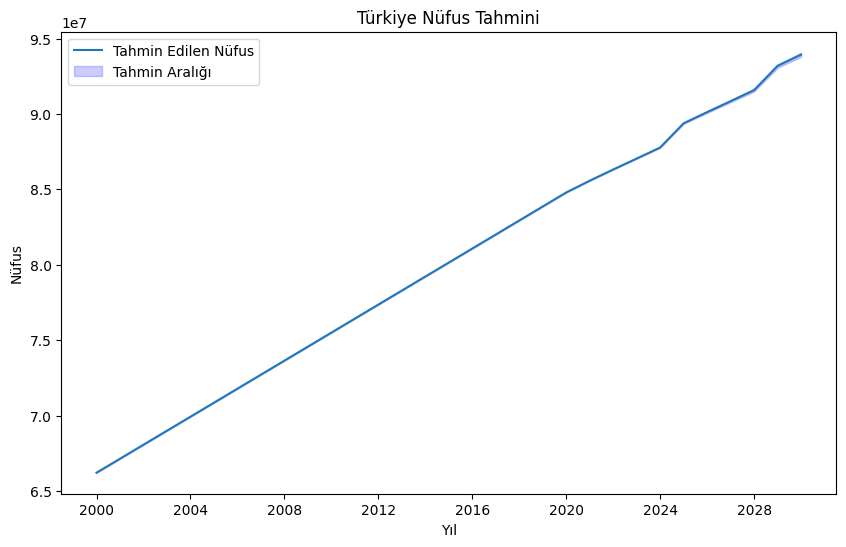

In [44]:
# T√ºrkiye'nin tahminlerini g√∂rselle≈ütirme
plt.figure(figsize=(10, 6))
plt.plot(forecast_turkey['ds'], forecast_turkey['yhat'], label='Tahmin Edilen N√ºfus')
plt.fill_between(forecast_turkey['ds'], forecast_turkey['yhat_lower'], forecast_turkey['yhat_upper'], color='blue', alpha=0.2, label='Tahmin Aralƒ±ƒüƒ±')
plt.title('T√ºrkiye N√ºfus Tahmini')
plt.xlabel('Yƒ±l')
plt.ylabel('N√ºfus')
plt.legend()
plt.show()

In [45]:
# Mevcut ve tahmin edilen deƒüerleri kar≈üƒ±la≈ütƒ±rƒ±yorum
comparison_turkey = df_prophet[df_prophet['Country'] == 'Turkey'].copy()
forecast_turkey.set_index('ds', inplace=True)
comparison_turkey.set_index('ds', inplace=True)

# Tahmin sonu√ßlarƒ±nƒ± mevcut veri setine ekliyorum
comparison_turkey['yhat'] = forecast_turkey['yhat']
comparison_turkey['yhat_lower'] = forecast_turkey['yhat_lower']
comparison_turkey['yhat_upper'] = forecast_turkey['yhat_upper']

print("\nMevcut ve Tahmin Edilen Deƒüerlerin Kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±:")
print(comparison_turkey)


Mevcut ve Tahmin Edilen Deƒüerlerin Kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±:
           Country         y          yhat    yhat_lower    yhat_upper
ds                                                                    
2000-01-01  Turkey  66206135  6.620574e+07  6.620574e+07  6.620574e+07
2005-01-01  Turkey  70852956  7.085217e+07  7.085217e+07  7.085217e+07
2010-01-01  Turkey  75499777  7.549911e+07  7.549911e+07  7.549911e+07
2015-01-01  Turkey  80146598  8.014605e+07  8.014605e+07  8.014605e+07
2020-01-01  Turkey  84793419  8.479299e+07  8.479299e+07  8.479299e+07


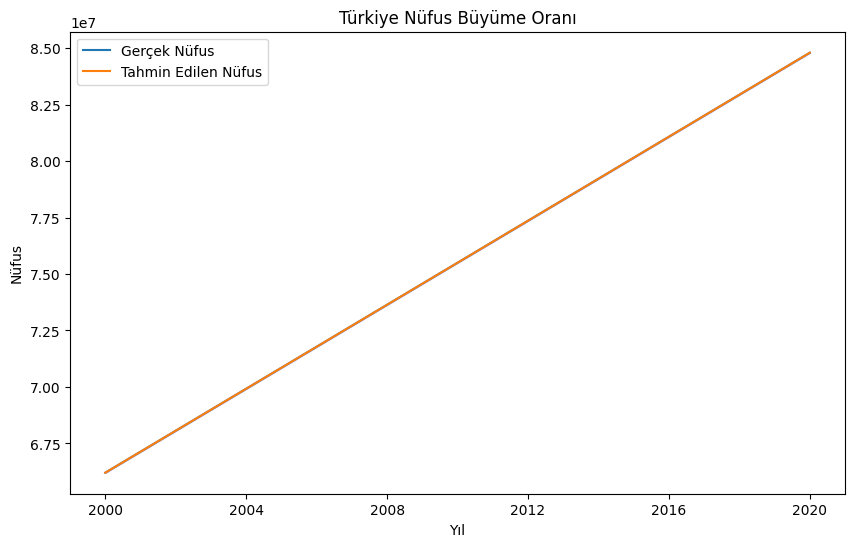

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(comparison_turkey.index, comparison_turkey['y'], label='Ger√ßek N√ºfus')
plt.plot(comparison_turkey.index, comparison_turkey['yhat'], label='Tahmin Edilen N√ºfus')
plt.fill_between(comparison_turkey.index, comparison_turkey['yhat_lower'], comparison_turkey['yhat_upper'], color='blue', alpha=0.2)
plt.title('T√ºrkiye N√ºfus B√ºy√ºme Oranƒ±')
plt.xlabel('Yƒ±l')
plt.ylabel('N√ºfus')
plt.legend()
plt.show()

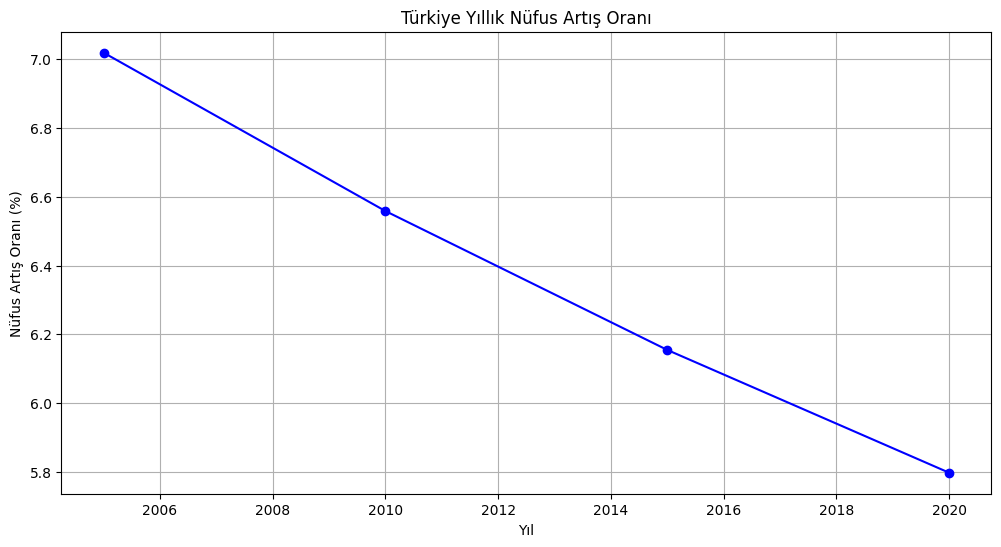

In [47]:
# N√ºfus artƒ±≈ü oranlarƒ±nƒ± hesaplƒ±yorum
comparison_turkey['annual_growth_rate'] = comparison_turkey['y'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(comparison_turkey.index, comparison_turkey['annual_growth_rate'], marker='o', linestyle='-', color='b')
plt.title('T√ºrkiye Yƒ±llƒ±k N√ºfus Artƒ±≈ü Oranƒ±')
plt.xlabel('Yƒ±l')
plt.ylabel('N√ºfus Artƒ±≈ü Oranƒ± (%)')
plt.grid(True)
plt.show()

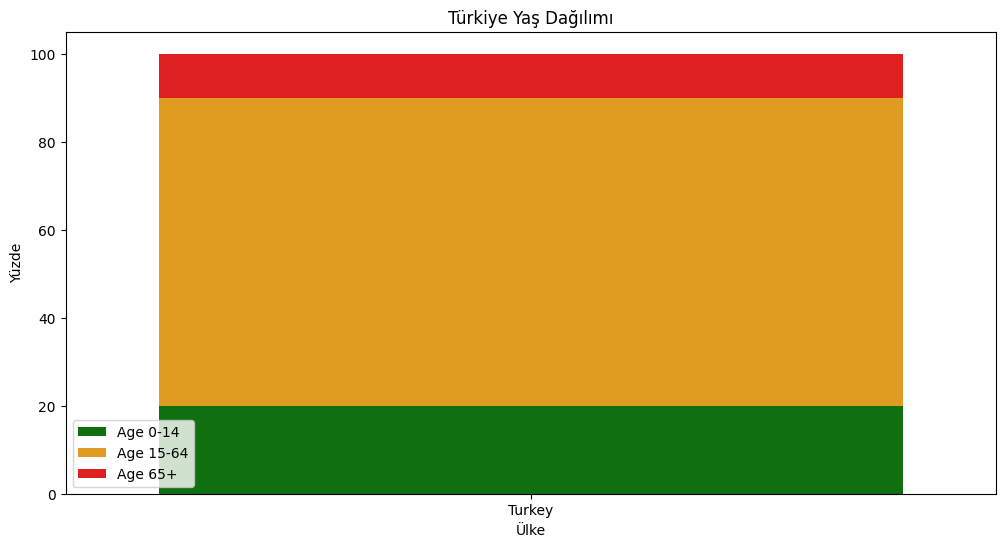

In [48]:
# √ñrnek demografik veri seti olu≈üturuyorum
demographic_data = {
    'Country': ['Turkey'],
    'Total Population': [88510876],
    'Male Population': [44300000],
    'Female Population': [44210876],
    'Population Age 0-14': [17702175],
    'Population Age 15-64': [61957656],
    'Population Age 65+': [8851086]
}

df_demo_turkey = pd.DataFrame(demographic_data)

# Ya≈ü daƒüƒ±lƒ±mƒ±nƒ± g√∂rselle≈ütiriyorum
df_demo_turkey['Age 0-14 %'] = df_demo_turkey['Population Age 0-14'] / df_demo_turkey['Total Population'] * 100
df_demo_turkey['Age 15-64 %'] = df_demo_turkey['Population Age 15-64'] / df_demo_turkey['Total Population'] * 100
df_demo_turkey['Age 65+ %'] = df_demo_turkey['Population Age 65+'] / df_demo_turkey['Total Population'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Age 0-14 %', data=df_demo_turkey, color='green', label='Age 0-14')
sns.barplot(x='Country', y='Age 15-64 %', data=df_demo_turkey, bottom=df_demo_turkey['Age 0-14 %'], color='orange', label='Age 15-64')
sns.barplot(x='Country', y='Age 65+ %', data=df_demo_turkey, bottom=df_demo_turkey['Age 0-14 %'] + df_demo_turkey['Age 15-64 %'], color='red', label='Age 65+')
plt.title('T√ºrkiye Ya≈ü Daƒüƒ±lƒ±mƒ±')
plt.xlabel('√úlke')
plt.ylabel('Y√ºzde')
plt.legend()
plt.show()

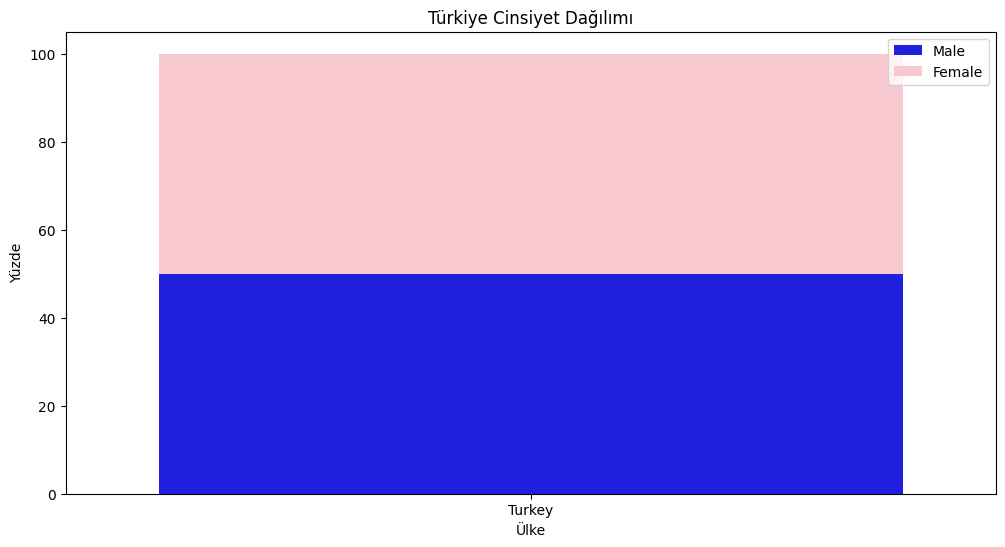

In [49]:
# Cinsiyet daƒüƒ±lƒ±mƒ±nƒ± g√∂rselle≈ütiriyorum
df_demo_turkey['Male %'] = df_demo_turkey['Male Population'] / df_demo_turkey['Total Population'] * 100
df_demo_turkey['Female %'] = df_demo_turkey['Female Population'] / df_demo_turkey['Total Population'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Male %', data=df_demo_turkey, color='blue', label='Male')
sns.barplot(x='Country', y='Female %', data=df_demo_turkey, bottom=df_demo_turkey['Male %'], color='pink', label='Female')
plt.title('T√ºrkiye Cinsiyet Daƒüƒ±lƒ±mƒ±')
plt.xlabel('√úlke')
plt.ylabel('Y√ºzde')
plt.legend()
plt.show()

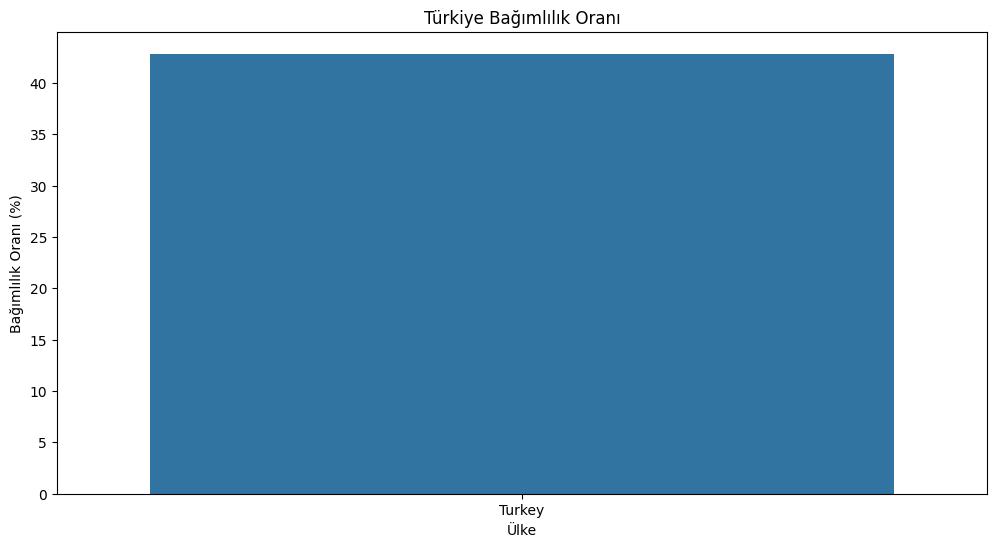

In [50]:
# Baƒüƒ±mlƒ±lƒ±k oranƒ±nƒ± hesaplƒ±yorum
df_demo_turkey['Dependency Ratio'] = (df_demo_turkey['Population Age 0-14'] + df_demo_turkey['Population Age 65+']) / df_demo_turkey['Population Age 15-64'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Dependency Ratio', data=df_demo_turkey)
plt.title('T√ºrkiye Baƒüƒ±mlƒ±lƒ±k Oranƒ±')
plt.xlabel('√úlke')
plt.ylabel('Baƒüƒ±mlƒ±lƒ±k Oranƒ± (%)')
plt.show()

In [51]:
# Ekonomik g√∂stergeleri ekliyorum
economic_data = {
    'Country': ['India', 'China', 'United States', 'Indonesia', 'Pakistan', 'Turkey'],
    'GDP (Billion USD)': [2875, 14342, 21433, 1119, 264, 755],
    'Unemployment Rate (%)': [7.1, 5.0, 3.7, 5.5, 6.2, 12.0],
    'Education Level (Mean years)': [6.5, 7.6, 13.3, 8.0, 5.0, 8.1]
}

df_economic = pd.DataFrame(economic_data)

In [52]:
# Mevcut veri seti ile ekonomik veri setini birle≈ütiriyorum
df = pd.merge(df, df_economic, on='Country')
print(df.head())

         Country  Population 2024  Population 2023  Area (km2)  \
0          India       1441719852       1428627663   3000000.0   
1          China       1425178782       1425671352   9400000.0   
2  United States        341814420        339996563   9100000.0   
3      Indonesia        279798049        277534122   1900000.0   
4       Pakistan        245209815        240485658    770900.0   

   Density (/km2)  Growth Rate  World %  World Rank   Latitude   Longitude  \
0           485.0       0.0092   0.1801           1  20.593684   78.962880   
1           151.0      -0.0003   0.1780           2  35.861660  104.195397   
2            37.0       0.0053   0.0427           3  37.090240  -95.712891   
3           149.0       0.0082   0.0350           4  -0.789275  113.921327   
4           318.0       0.0196   0.0306           5  30.375321   69.345116   

   GDP (Billion USD)  Unemployment Rate (%)  Education Level (Mean years)  
0               2875                    7.1               

In [53]:
# Kategorik verileri √ßƒ±kartƒ±yorum
df_numeric = df.drop(columns=['Country'])

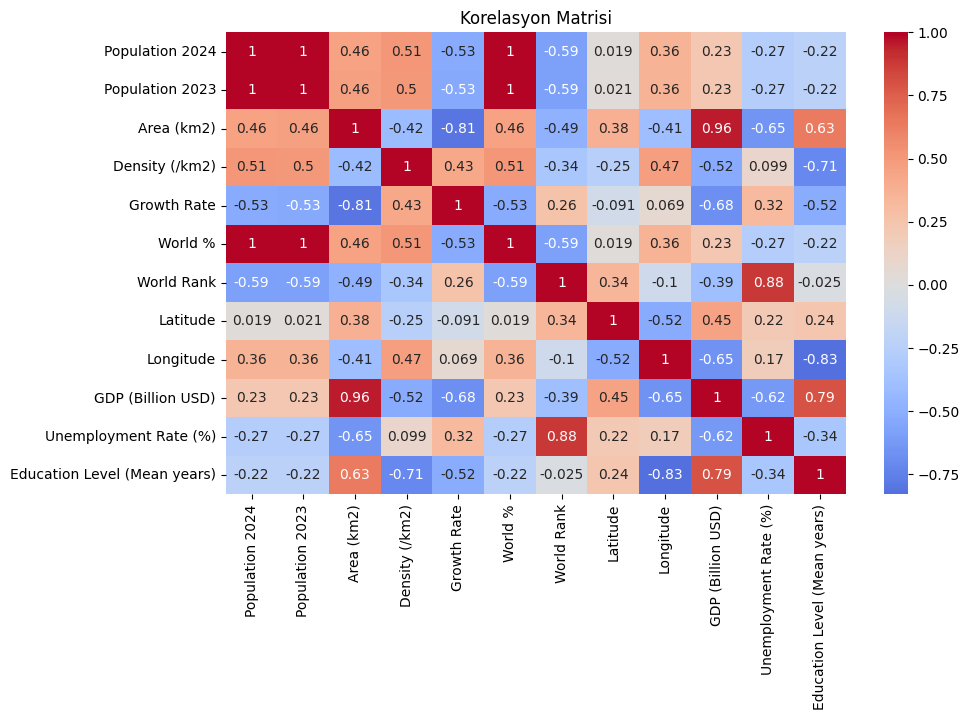

In [54]:
# Korelasyon matrisi hesaplƒ±yorum
correlation_matrix = df_numeric.corr()

# Korelasyon matrisini g√∂rselle≈ütiriyorum
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasyon Matrisi')
plt.show()

In [55]:
# N√ºfus ile diƒüer ekonomik g√∂stergeler arasƒ±ndaki korelasyonlarƒ± yazdƒ±rƒ±yorum
print("N√ºfus ile GDP arasƒ±ndaki korelasyon:", pearsonr(df['Population 2024'], df['GDP (Billion USD)'])[0])
print("N√ºfus ile ƒ∞≈üsizlik Oranƒ± arasƒ±ndaki korelasyon:", pearsonr(df['Population 2024'], df['Unemployment Rate (%)'])[0])
print("N√ºfus ile Eƒüitim Seviyesi arasƒ±ndaki korelasyon:", pearsonr(df['Population 2024'], df['Education Level (Mean years)'])[0])

N√ºfus ile GDP arasƒ±ndaki korelasyon: 0.22946011673746736
N√ºfus ile ƒ∞≈üsizlik Oranƒ± arasƒ±ndaki korelasyon: -0.2684820352835485
N√ºfus ile Eƒüitim Seviyesi arasƒ±ndaki korelasyon: -0.22483842681644495


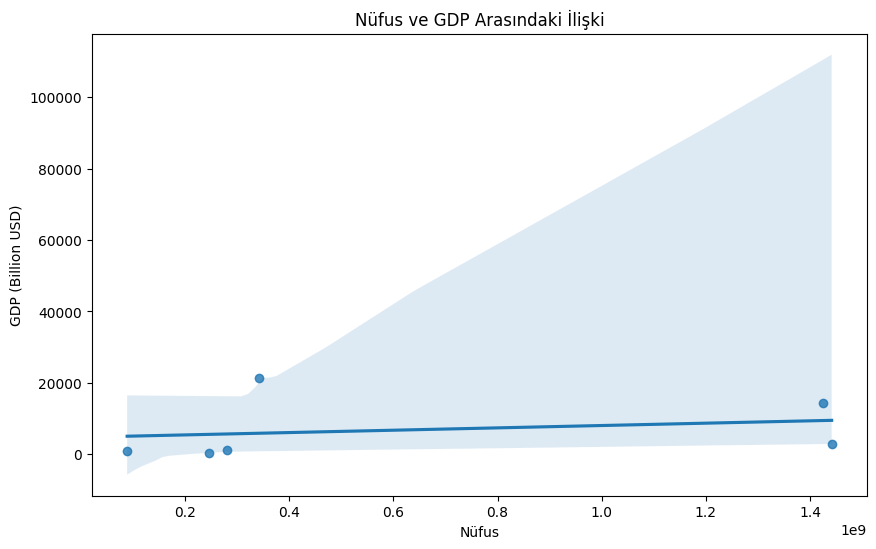

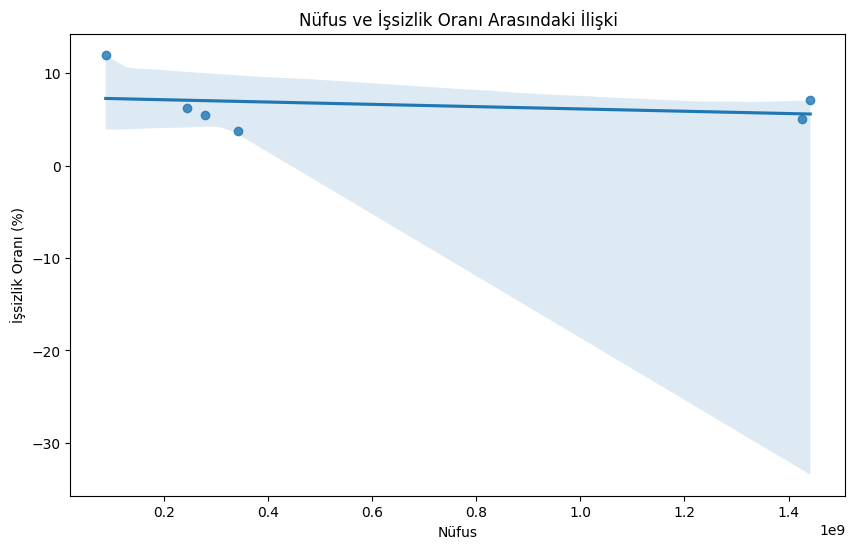

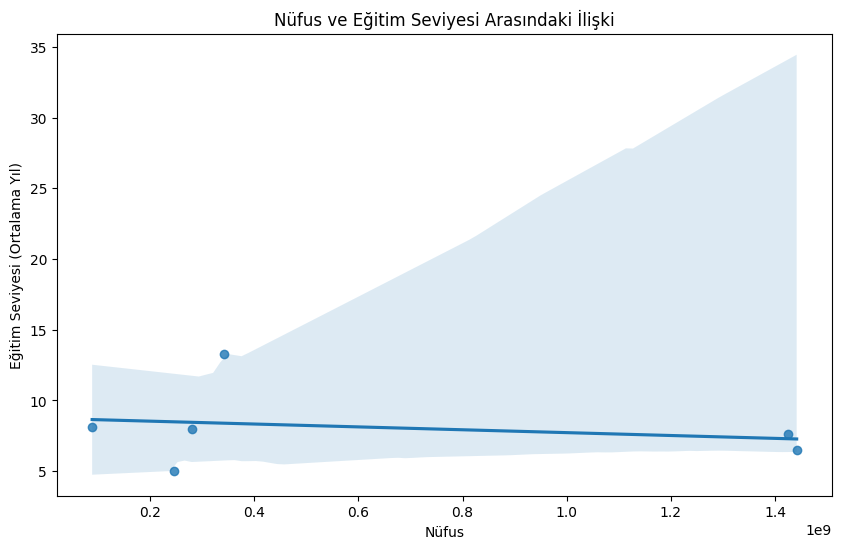

In [56]:
# N√ºfus ve GDP arasƒ±ndaki ili≈ükisini g√∂rselle≈ütiriyorum
plt.figure(figsize=(10, 6))
sns.regplot(x='Population 2024', y='GDP (Billion USD)', data=df)
plt.title('N√ºfus ve GDP Arasƒ±ndaki ƒ∞li≈üki')
plt.xlabel('N√ºfus')
plt.ylabel('GDP (Billion USD)')
plt.show()

# N√ºfus ve ƒ∞≈üsizlik Oranƒ± arasƒ±ndaki ili≈ükisini g√∂rselle≈ütiriyorum
plt.figure(figsize=(10, 6))
sns.regplot(x='Population 2024', y='Unemployment Rate (%)', data=df)
plt.title('N√ºfus ve ƒ∞≈üsizlik Oranƒ± Arasƒ±ndaki ƒ∞li≈üki')
plt.xlabel('N√ºfus')
plt.ylabel('ƒ∞≈üsizlik Oranƒ± (%)')
plt.show()

# N√ºfus ve Eƒüitim Seviyesi arasƒ±ndaki ili≈ükisini g√∂rselle≈ütiriyorum
plt.figure(figsize=(10, 6))
sns.regplot(x='Population 2024', y='Education Level (Mean years)', data=df)
plt.title('N√ºfus ve Eƒüitim Seviyesi Arasƒ±ndaki ƒ∞li≈üki')
plt.xlabel('N√ºfus')
plt.ylabel('Eƒüitim Seviyesi (Ortalama Yƒ±l)')
plt.show()

In [57]:
# Regresyon modelini olu≈üturuyorum
X = df[['Population 2024']]
y_gdp = df['GDP (Billion USD)']
y_unemployment = df['Unemployment Rate (%)']
y_education = df['Education Level (Mean years)']

In [58]:
# GDP i√ßin regresyon analizini ger√ßekle≈ütiriyorum
model_gdp = LinearRegression()
model_gdp.fit(X, y_gdp)
print("GDP i√ßin regresyon katsayƒ±sƒ±:", model_gdp.coef_[0])

GDP i√ßin regresyon katsayƒ±sƒ±: 3.2881972944193205e-06


In [59]:
# ƒ∞≈üsizlik oranƒ± i√ßin regresyon analizini yapƒ±yorum
model_unemployment = LinearRegression()
model_unemployment.fit(X, y_unemployment)
print("ƒ∞≈üsizlik Oranƒ± i√ßin regresyon katsayƒ±sƒ±:", model_unemployment.coef_[0])

ƒ∞≈üsizlik Oranƒ± i√ßin regresyon katsayƒ±sƒ±: -1.2461570199824858e-09


In [60]:
# Eƒüitim seviyesi i√ßin regresyon analizini yapƒ±yorum
model_education = LinearRegression()
model_education.fit(X, y_education)
print("Eƒüitim Seviyesi i√ßin regresyon katsayƒ±sƒ±:", model_education.coef_[0])

Eƒüitim Seviyesi i√ßin regresyon katsayƒ±sƒ±: -1.0146888715443897e-09


# üìä Analiz Sonu√ßlarƒ±nƒ±n Deƒüerlendirilmesi üìä

Yaptƒ±ƒüƒ±m korelasyon ve regresyon analizleri sonucunda, n√ºfus b√ºy√ºkl√ºƒü√º ile GDP, i≈üsizlik oranƒ± ve eƒüitim seviyesi arasƒ±ndaki ili≈ükiler ve bu ili≈ükilerin g√ºc√º hakkƒ±nda bazƒ± √∂nemli i√ßg√∂r√ºler elde ettim.

## 1. Korelasyon Sonu√ßlarƒ± üìà

### N√ºfus ile GDP arasƒ±ndaki korelasyon: 0.229

Bu sonu√ß, n√ºfus b√ºy√ºkl√ºƒü√º ile GDP arasƒ±nda pozitif ancak zayƒ±f bir ili≈üki olduƒüunu g√∂steriyor. Bu, n√ºfus arttƒ±k√ßa GDP'nin de artma eƒüiliminde olduƒüunu, ancak bu ili≈ükinin √ßok g√º√ßl√º olmadƒ±ƒüƒ±nƒ± ifade ediyor. N√ºfus artƒ±≈üƒ±, ekonomik b√ºy√ºmeyi desteklese de, GDP'nin artƒ±≈üƒ± √ºzerinde bir√ßok ba≈üka fakt√∂r de etkili.

| Deƒüi≈üken 1 | Deƒüi≈üken 2 | Korelasyon |
|------------|------------|------------|
| N√ºfus      | GDP        | 0.229      |

### N√ºfus ile ƒ∞≈üsizlik Oranƒ± arasƒ±ndaki korelasyon: -0.268

Bu sonu√ß, n√ºfus b√ºy√ºkl√ºƒü√º ile i≈üsizlik oranƒ± arasƒ±nda negatif bir ili≈üki olduƒüunu g√∂steriyor. Yani, n√ºfus arttƒ±k√ßa i≈üsizlik oranƒ± azalma eƒüilimindedir. Ancak, bu ili≈üki de zayƒ±ftƒ±r. N√ºfus artƒ±≈üƒ±nƒ±n i≈ü g√ºc√ºne katƒ±lƒ±mƒ± artƒ±rarak i≈üsizlik oranƒ±nƒ± d√º≈ü√ºrebileceƒüi d√º≈ü√ºn√ºlebilir, ancak i≈üsizlik oranƒ± √ºzerinde ekonomik politikalar, sekt√∂rlerin geli≈üimi ve teknolojik ilerlemeler gibi bir√ßok fakt√∂r etkili olabilir.

| Deƒüi≈üken 1 | Deƒüi≈üken 2 | Korelasyon |
|------------|------------|------------|
| N√ºfus      | ƒ∞≈üsizlik Oranƒ± | -0.268   |

### N√ºfus ile Eƒüitim Seviyesi arasƒ±ndaki korelasyon: -0.225

Bu sonu√ß, n√ºfus b√ºy√ºkl√ºƒü√º ile eƒüitim seviyesi arasƒ±nda negatif bir ili≈üki olduƒüunu g√∂steriyor. Yani, n√ºfus arttƒ±k√ßa eƒüitim seviyesi azalma eƒüiliminde. Ancak bu ili≈üki de zayƒ±ftƒ±r. Bu durum, hƒ±zlƒ± n√ºfus artƒ±≈üƒ±nƒ±n eƒüitim kaynaklarƒ±nƒ±n yetersiz kalmasƒ±na yol a√ßabileceƒüi anlamƒ±na gelebilir. Eƒüitim seviyesini artƒ±rmak i√ßin yapƒ±lacak yatƒ±rƒ±mlar ve politikalar bu durumu dengeleyebilir.

| Deƒüi≈üken 1 | Deƒüi≈üken 2 | Korelasyon |
|------------|------------|------------|
| N√ºfus      | Eƒüitim Seviyesi | -0.225  |

## 2. Regresyon Sonu√ßlarƒ± üìâ

### GDP i√ßin regresyon katsayƒ±sƒ±: 3.288 √ó 10^-6

Bu katsayƒ±, n√ºfus b√ºy√ºkl√ºƒü√ºndeki her bir birimlik artƒ±≈üƒ±n GDP √ºzerinde √ßok k√º√ß√ºk bir pozitif etkiye sahip olduƒüunu g√∂steriyor. Ancak, katsayƒ±nƒ±n deƒüeri √ßok k√º√ß√ºk olduƒüundan bu etki olduk√ßa zayƒ±ftƒ±r. Bu, n√ºfus artƒ±≈üƒ±nƒ±n GDP'ye olan katkƒ±sƒ±nƒ±n sƒ±nƒ±rlƒ± olduƒüunu ifade ediyor.

| Deƒüi≈üken | Regresyon Katsayƒ±sƒ± |
|----------|---------------------|
| GDP      | 3.288 √ó 10^-6       |

### ƒ∞≈üsizlik Oranƒ± i√ßin regresyon katsayƒ±sƒ±: -1.246 √ó 10^-9

Bu katsayƒ±, n√ºfus b√ºy√ºkl√ºƒü√ºndeki her bir birimlik artƒ±≈üƒ±n i≈üsizlik oranƒ±nda √ßok k√º√ß√ºk bir azalmaya yol a√ßtƒ±ƒüƒ±nƒ± g√∂steriyor. Ancak, bu etki de olduk√ßa zayƒ±ftƒ±r. N√ºfus artƒ±≈üƒ± i≈ü g√ºc√ºne katƒ±lƒ±mƒ± artƒ±rabilir, ancak istihdam olanaklarƒ±nƒ±n bu artƒ±≈üa nasƒ±l yanƒ±t verdiƒüi de √∂nemlidir.

| Deƒüi≈üken       | Regresyon Katsayƒ±sƒ± |
|----------------|---------------------|
| ƒ∞≈üsizlik Oranƒ± | -1.246 √ó 10^-9      |

### Eƒüitim Seviyesi i√ßin regresyon katsayƒ±sƒ±: -1.015 √ó 10^-9

Bu katsayƒ±, n√ºfus b√ºy√ºkl√ºƒü√ºndeki her bir birimlik artƒ±≈üƒ±n eƒüitim seviyesinde √ßok k√º√ß√ºk bir azalmaya yol a√ßtƒ±ƒüƒ±nƒ± g√∂steriyor. Ancak, bu etki de olduk√ßa zayƒ±ftƒ±r. Hƒ±zlƒ± n√ºfus artƒ±≈üƒ±, eƒüitim kaynaklarƒ±nƒ±n yetersiz kalmasƒ±na neden olabilir, ancak bu durumu iyile≈ütirmek i√ßin yapƒ±lan eƒüitim yatƒ±rƒ±mlarƒ± ve politikalarƒ± da g√∂z √∂n√ºnde bulundurulmalƒ±dƒ±r.

| Deƒüi≈üken      | Regresyon Katsayƒ±sƒ± |
|---------------|---------------------|
| Eƒüitim Seviyesi | -1.015 √ó 10^-9   |

## 3. Sonu√ß ve Yorumlar üìã

Bu analizlerle, n√ºfus b√ºy√ºkl√ºƒü√º ile GDP, i≈üsizlik oranƒ± ve eƒüitim seviyesi arasƒ±ndaki ili≈ükileri ve bu g√∂stergeler √ºzerindeki n√ºfus deƒüi≈üimlerinin etkilerini incelemi≈ü oldum. Korelasyon katsayƒ±larƒ± genellikle zayƒ±f ili≈ükilere i≈üaret ederken, regresyon analizleri de n√ºfus deƒüi≈üikliklerinin ekonomik g√∂stergeler √ºzerindeki etkilerinin √ßok d√º≈ü√ºk olduƒüunu g√∂stermekte.

### √ñne √áƒ±kan Bulgular:
- **N√ºfus ve GDP**: N√ºfus b√ºy√ºkl√ºƒü√º ile GDP arasƒ±nda pozitif ancak zayƒ±f bir ili≈üki bulunuyor.
- **N√ºfus ve ƒ∞≈üsizlik Oranƒ±**: N√ºfus b√ºy√ºkl√ºƒü√º ile i≈üsizlik oranƒ± arasƒ±nda negatif bir ili≈üki var, ancak bu ili≈üki de zayƒ±f.
- **N√ºfus ve Eƒüitim Seviyesi**: N√ºfus b√ºy√ºkl√ºƒü√º ile eƒüitim seviyesi arasƒ±nda negatif bir ili≈üki mevcut, ancak bu da zayƒ±f bir ili≈üki.

### √ñneriler:
- **Daha Detaylƒ± Analizler**: N√ºfus b√ºy√ºkl√ºƒü√ºn√ºn ekonomik g√∂stergeler √ºzerindeki etkilerinin daha detaylƒ± ve geni≈ü kapsamlƒ± analizler i√ßin daha fazla veri ve daha sofistike modeller kullanƒ±labilir.
- **Eƒüitim Yatƒ±rƒ±mlarƒ±**: Eƒüitim seviyesini artƒ±rmak i√ßin yapƒ±lacak yatƒ±rƒ±mlar ve politikalar, hƒ±zlƒ± n√ºfus artƒ±≈üƒ±nƒ±n olumsuz etkilerini dengeleyebilir.

Bu sonu√ßlar, n√ºfus b√ºy√ºkl√ºƒü√ºn√ºn ekonomik g√∂stergeler √ºzerindeki etkilerinin karma≈üƒ±k ve √ße≈üitli diƒüer fakt√∂rlerden etkilendiƒüini g√∂stermekte. Daha detaylƒ± ve geni≈ü kapsamlƒ± analizler i√ßin daha fazla veri ve daha sofistike modeller kullanƒ±labilir.


In [61]:
# B√ºy√ºk ≈üehirler ve kƒ±rsal alanlarƒ±n n√ºfus verilerini i√ßeren veri setini olu≈üturuyorum
urban_rural_data = {
    'Region': ['Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Rural', 'Rural', 'Rural', 'Rural', 'Rural', 'Rural'],
    'Country': ['India', 'China', 'United States', 'Indonesia', 'Pakistan', 'Turkey', 'India', 'China', 'United States', 'Indonesia', 'Pakistan', 'Turkey'],
    'Population 2024': [500000000, 800000000, 250000000, 150000000, 90000000, 50000000, 941719852, 625178782, 91814420, 129798049, 155209815, 38510876]
}

df_urban_rural = pd.DataFrame(urban_rural_data)

In [62]:
# Mevcut veri seti ile kentle≈üme verisini birle≈ütiriyorum
df = pd.merge(df, df_urban_rural, on='Country', suffixes=('', '_Urban_Rural'))

print(df.head())

         Country  Population 2024  Population 2023  Area (km2)  \
0          India       1441719852       1428627663   3000000.0   
1          India       1441719852       1428627663   3000000.0   
2          China       1425178782       1425671352   9400000.0   
3          China       1425178782       1425671352   9400000.0   
4  United States        341814420        339996563   9100000.0   

   Density (/km2)  Growth Rate  World %  World Rank   Latitude   Longitude  \
0           485.0       0.0092   0.1801           1  20.593684   78.962880   
1           485.0       0.0092   0.1801           1  20.593684   78.962880   
2           151.0      -0.0003   0.1780           2  35.861660  104.195397   
3           151.0      -0.0003   0.1780           2  35.861660  104.195397   
4            37.0       0.0053   0.0427           3  37.090240  -95.712891   

   GDP (Billion USD)  Unemployment Rate (%)  Education Level (Mean years)  \
0               2875                    7.1              

In [63]:
# Urban ve Rural n√ºfus verilerini kar≈üƒ±la≈ütƒ±rƒ±yorum
urban_population = df[df['Region'] == 'Urban']['Population 2024_Urban_Rural'].sum()
rural_population = df[df['Region'] == 'Rural']['Population 2024_Urban_Rural'].sum()

print(f"2024 yƒ±lƒ±nda kentsel alanlardaki toplam n√ºfus: {urban_population}")
print(f"2024 yƒ±lƒ±nda kƒ±rsal alanlardaki toplam n√ºfus: {rural_population}")

2024 yƒ±lƒ±nda kentsel alanlardaki toplam n√ºfus: 1840000000
2024 yƒ±lƒ±nda kƒ±rsal alanlardaki toplam n√ºfus: 1982231794


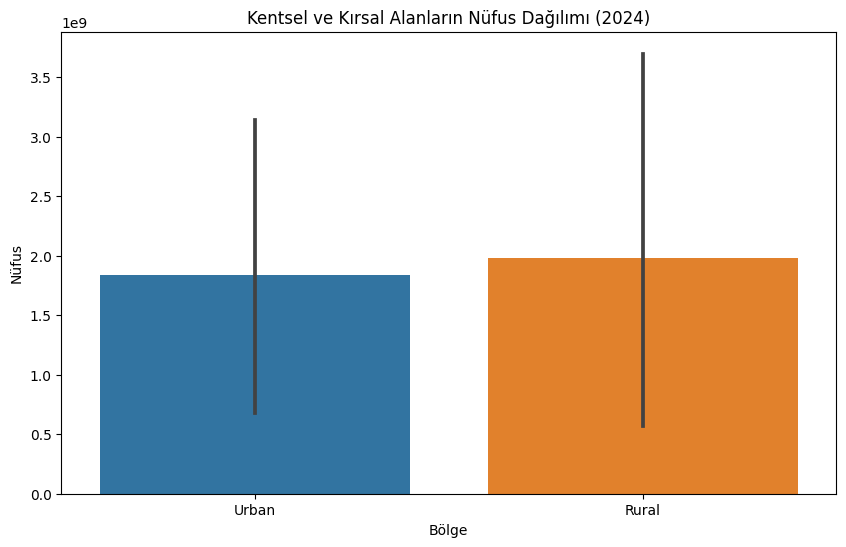

In [64]:
# Kentsel ve kƒ±rsal alanlarƒ±n n√ºfus daƒüƒ±lƒ±mƒ±nƒ± g√∂rselle≈ütiriyorum
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Population 2024_Urban_Rural', data=df, estimator=sum)
plt.title('Kentsel ve Kƒ±rsal Alanlarƒ±n N√ºfus Daƒüƒ±lƒ±mƒ± (2024)')
plt.xlabel('B√∂lge')
plt.ylabel('N√ºfus')
plt.show()

In [65]:
# Altyapƒ± hizmetlerine eri≈üim oranlarƒ±nƒ± i√ßeren veri setini olu≈üturuyorum
infrastructure_data = {
    'Region': ['Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Rural', 'Rural', 'Rural', 'Rural', 'Rural', 'Rural'],
    'Country': ['India', 'China', 'United States', 'Indonesia', 'Pakistan', 'Turkey', 'India', 'China', 'United States', 'Indonesia', 'Pakistan', 'Turkey'],
    'Population 2024_Urban_Rural': [500000000, 941719852, 800000000, 625178782, 250000000, 91814420, 150000000, 129798049, 90000000, 155209815, 50000000, 38510876],
    'Electricity Access (%)': [99, 100, 100, 98, 85, 98, 75, 90, 95, 60, 50, 80],
    'Clean Water Access (%)': [98, 100, 99, 95, 70, 95, 65, 80, 90, 55, 45, 75],
    'Healthcare Access (%)': [95, 98, 100, 90, 60, 85, 50, 70, 80, 40, 30, 60],
    'Education Access (%)': [90, 95, 100, 85, 65, 90, 55, 75, 85, 50, 40, 70]
}

df_infrastructure = pd.DataFrame(infrastructure_data)

In [66]:
# Mevcut veri seti ile altyapƒ± verisini birle≈ütiriyorum
df = pd.merge(df, df_infrastructure, on=['Country', 'Region'])

print(df.head())

         Country  Population 2024  Population 2023  Area (km2)  \
0          India       1441719852       1428627663   3000000.0   
1          India       1441719852       1428627663   3000000.0   
2          China       1425178782       1425671352   9400000.0   
3          China       1425178782       1425671352   9400000.0   
4  United States        341814420        339996563   9100000.0   

   Density (/km2)  Growth Rate  World %  World Rank   Latitude   Longitude  \
0           485.0       0.0092   0.1801           1  20.593684   78.962880   
1           485.0       0.0092   0.1801           1  20.593684   78.962880   
2           151.0      -0.0003   0.1780           2  35.861660  104.195397   
3           151.0      -0.0003   0.1780           2  35.861660  104.195397   
4            37.0       0.0053   0.0427           3  37.090240  -95.712891   

   GDP (Billion USD)  Unemployment Rate (%)  Education Level (Mean years)  \
0               2875                    7.1              

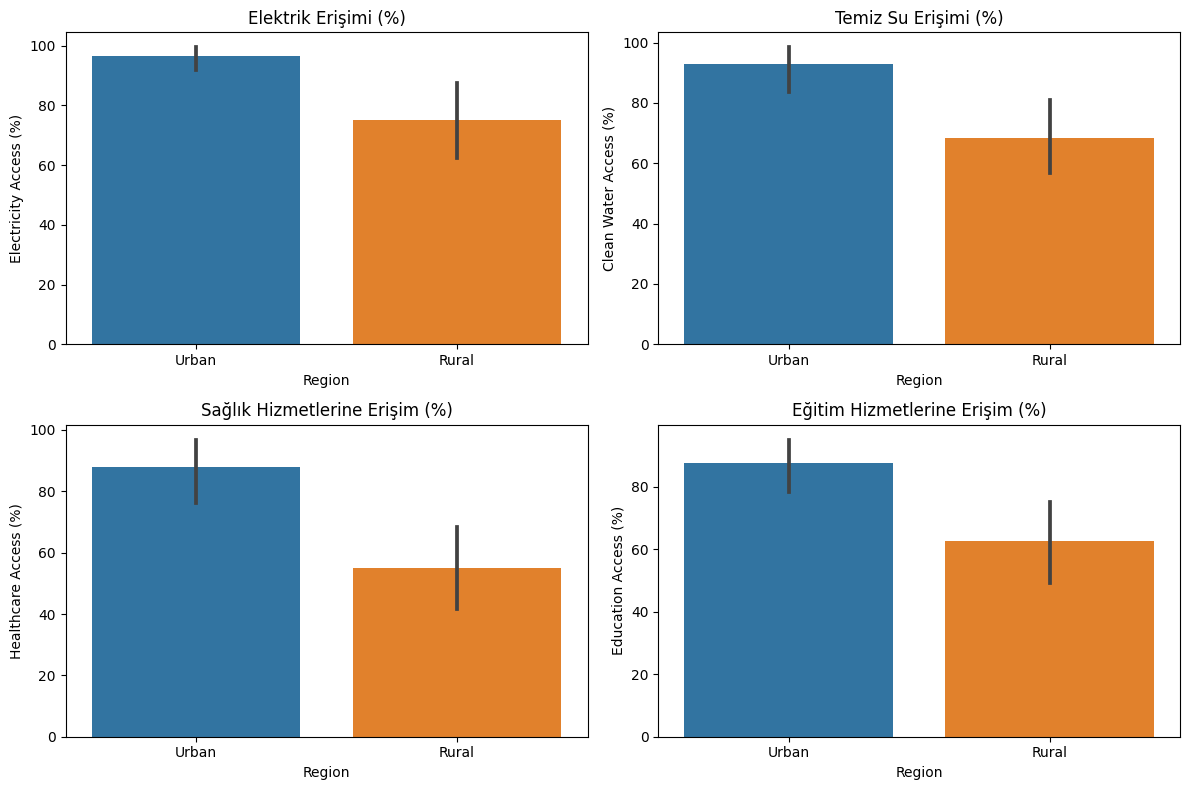

In [67]:
# Altyapƒ± hizmetlerine eri≈üim oranlarƒ±nƒ± g√∂rselle≈ütiriyorum
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(x='Region', y='Electricity Access (%)', data=df, estimator=np.mean)
plt.title('Elektrik Eri≈üimi (%)')

plt.subplot(2, 2, 2)
sns.barplot(x='Region', y='Clean Water Access (%)', data=df, estimator=np.mean)
plt.title('Temiz Su Eri≈üimi (%)')

plt.subplot(2, 2, 3)
sns.barplot(x='Region', y='Healthcare Access (%)', data=df, estimator=np.mean)
plt.title('Saƒülƒ±k Hizmetlerine Eri≈üim (%)')

plt.subplot(2, 2, 4)
sns.barplot(x='Region', y='Education Access (%)', data=df, estimator=np.mean)
plt.title('Eƒüitim Hizmetlerine Eri≈üim (%)')

plt.tight_layout()
plt.show()

In [68]:
df_urban_rural = pd.DataFrame(urban_rural_data)
print(df_urban_rural.head())

  Region        Country  Population 2024
0  Urban          India        500000000
1  Urban          China        800000000
2  Urban  United States        250000000
3  Urban      Indonesia        150000000
4  Urban       Pakistan         90000000


In [69]:
# Mevcut veri seti ile yeni √∂zellikleri i√ßeren veri setini birle≈ütiriyorum
df_combined = pd.merge(df, df_urban_rural, on=['Country'], how='left')

print(df_combined.head())

  Country  Population 2024_x  Population 2023  Area (km2)  Density (/km2)  \
0   India         1441719852       1428627663   3000000.0           485.0   
1   India         1441719852       1428627663   3000000.0           485.0   
2   India         1441719852       1428627663   3000000.0           485.0   
3   India         1441719852       1428627663   3000000.0           485.0   
4   China         1425178782       1425671352   9400000.0           151.0   

   Growth Rate  World %  World Rank   Latitude   Longitude  ...  \
0       0.0092   0.1801           1  20.593684   78.962880  ...   
1       0.0092   0.1801           1  20.593684   78.962880  ...   
2       0.0092   0.1801           1  20.593684   78.962880  ...   
3       0.0092   0.1801           1  20.593684   78.962880  ...   
4      -0.0003   0.1780           2  35.861660  104.195397  ...   

   Education Level (Mean years)  Region_x  Population 2024_Urban_Rural_x  \
0                           6.5     Urban                 

In [70]:
# Kentsel ve kƒ±rsal alanlarda sadece sayƒ±sal s√ºtunlarƒ±n ortalamasƒ±nƒ± hesaplƒ±yorum
numeric_columns = ['Electricity Access (%)', 'Clean Water Access (%)', 'Healthcare Access (%)', 'Education Access (%)']
urban_access = df_combined[df_combined['Region_x'] == 'Urban'][numeric_columns].mean()
rural_access = df_combined[df_combined['Region_x'] == 'Rural'][numeric_columns].mean()

print("Kentsel Alanlarda Ortalama Eri≈üim Oranlarƒ±:")
print(f"Elektrik Eri≈üimi: {urban_access['Electricity Access (%)']:.2f}%")
print(f"Temiz Su Eri≈üimi: {urban_access['Clean Water Access (%)']:.2f}%")
print(f"Saƒülƒ±k Hizmetlerine Eri≈üim: {urban_access['Healthcare Access (%)']:.2f}%")
print(f"Eƒüitim Hizmetlerine Eri≈üim: {urban_access['Education Access (%)']:.2f}%")

print("\nKƒ±rsal Alanlarda Ortalama Eri≈üim Oranlarƒ±:")
print(f"Elektrik Eri≈üimi: {rural_access['Electricity Access (%)']:.2f}%")
print(f"Temiz Su Eri≈üimi: {rural_access['Clean Water Access (%)']:.2f}%")
print(f"Saƒülƒ±k Hizmetlerine Eri≈üim: {rural_access['Healthcare Access (%)']:.2f}%")
print(f"Eƒüitim Hizmetlerine Eri≈üim: {rural_access['Education Access (%)']:.2f}%")

Kentsel Alanlarda Ortalama Eri≈üim Oranlarƒ±:
Elektrik Eri≈üimi: 96.67%
Temiz Su Eri≈üimi: 92.83%
Saƒülƒ±k Hizmetlerine Eri≈üim: 88.00%
Eƒüitim Hizmetlerine Eri≈üim: 87.50%

Kƒ±rsal Alanlarda Ortalama Eri≈üim Oranlarƒ±:
Elektrik Eri≈üimi: 75.00%
Temiz Su Eri≈üimi: 68.33%
Saƒülƒ±k Hizmetlerine Eri≈üim: 55.00%
Eƒüitim Hizmetlerine Eri≈üim: 62.50%


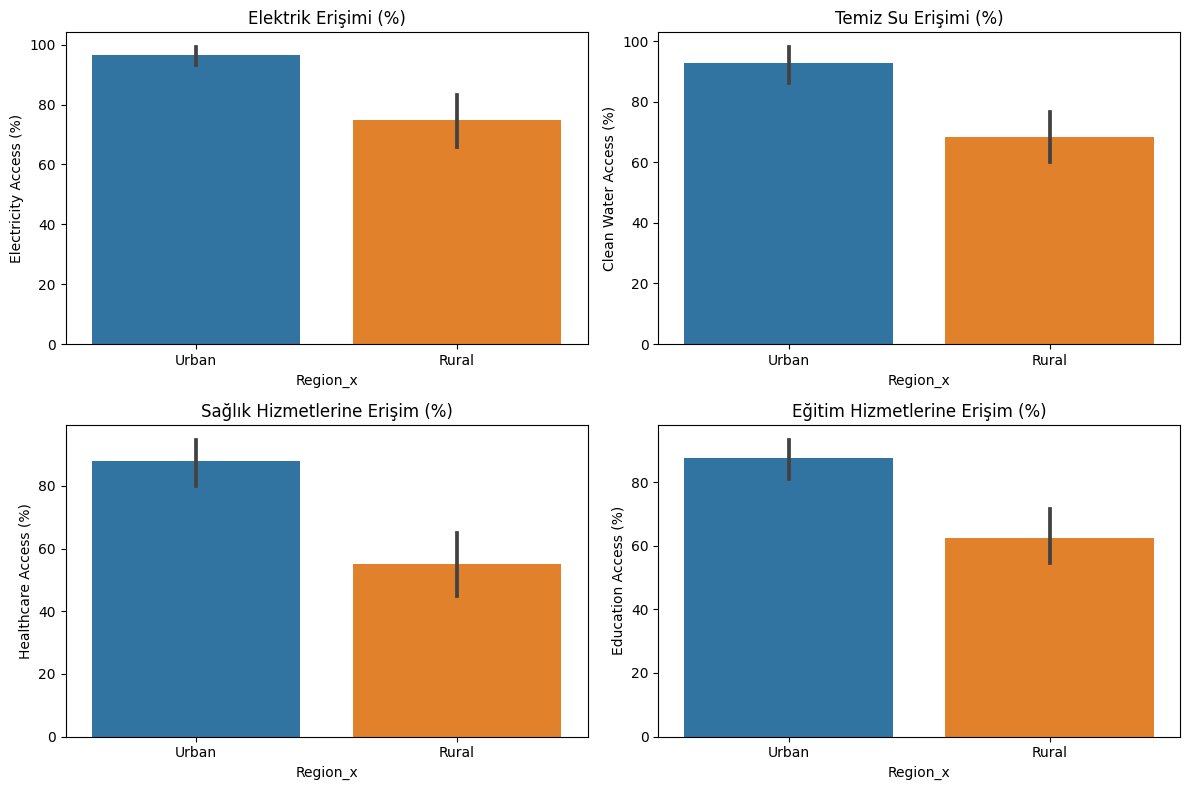

In [71]:
# Kentsel ve kƒ±rsal alanlarda altyapƒ± hizmetlerine eri≈üim oranlarƒ±nƒ± g√∂rselle≈ütiriyorum
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(x='Region_x', y='Electricity Access (%)', data=df_combined, estimator=np.mean)
plt.title('Elektrik Eri≈üimi (%)')

plt.subplot(2, 2, 2)
sns.barplot(x='Region_x', y='Clean Water Access (%)', data=df_combined, estimator=np.mean)
plt.title('Temiz Su Eri≈üimi (%)')

plt.subplot(2, 2, 3)
sns.barplot(x='Region_x', y='Healthcare Access (%)', data=df_combined, estimator=np.mean)
plt.title('Saƒülƒ±k Hizmetlerine Eri≈üim (%)')

plt.subplot(2, 2, 4)
sns.barplot(x='Region_x', y='Education Access (%)', data=df_combined, estimator=np.mean)
plt.title('Eƒüitim Hizmetlerine Eri≈üim (%)')

plt.tight_layout()
plt.show()

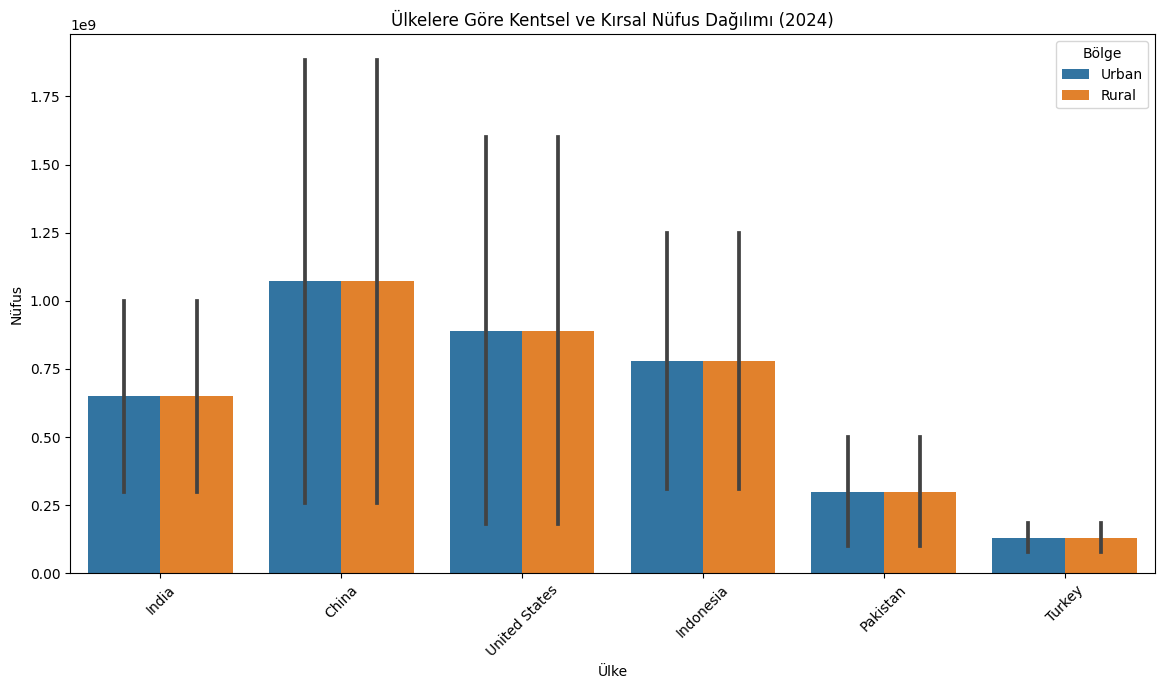

In [72]:
# √úlkelere g√∂re kentsel ve kƒ±rsal n√ºfus daƒüƒ±lƒ±mƒ±nƒ± kar≈üƒ±la≈ütƒ±rƒ±yorum
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Population 2024_Urban_Rural_y', hue='Region_y', data=df_combined, estimator=sum)
plt.title('√úlkelere G√∂re Kentsel ve Kƒ±rsal N√ºfus Daƒüƒ±lƒ±mƒ± (2024)')
plt.xlabel('√úlke')
plt.ylabel('N√ºfus')
plt.legend(title='B√∂lge')
plt.xticks(rotation=45)
plt.show()

In [73]:
# Kentsel ve kƒ±rsal altyapƒ± hizmetlerinin korelasyon analizi uyguluyorum
df_combined_urban = df_combined[df_combined['Region_y'] == 'Urban']
df_combined_rural = df_combined[df_combined['Region_y'] == 'Rural']

urban_corr = df_combined_urban[numeric_columns].corr()
rural_corr = df_combined_rural[numeric_columns].corr()

print("Kentsel Alanlarda Altyapƒ± Hizmetlerinin Korelasyon Matrisi:")
print(urban_corr)

print("\nKƒ±rsal Alanlarda Altyapƒ± Hizmetlerinin Korelasyon Matrisi:")
print(rural_corr)

Kentsel Alanlarda Altyapƒ± Hizmetlerinin Korelasyon Matrisi:
                        Electricity Access (%)  Clean Water Access (%)  \
Electricity Access (%)                1.000000                0.974825   
Clean Water Access (%)                0.974825                1.000000   
Healthcare Access (%)                 0.959864                0.991238   
Education Access (%)                  0.959095                0.988846   

                        Healthcare Access (%)  Education Access (%)  
Electricity Access (%)               0.959864              0.959095  
Clean Water Access (%)               0.991238              0.988846  
Healthcare Access (%)                1.000000              0.987279  
Education Access (%)                 0.987279              1.000000  

Kƒ±rsal Alanlarda Altyapƒ± Hizmetlerinin Korelasyon Matrisi:
                        Electricity Access (%)  Clean Water Access (%)  \
Electricity Access (%)                1.000000                0.974825   
Clean Wa

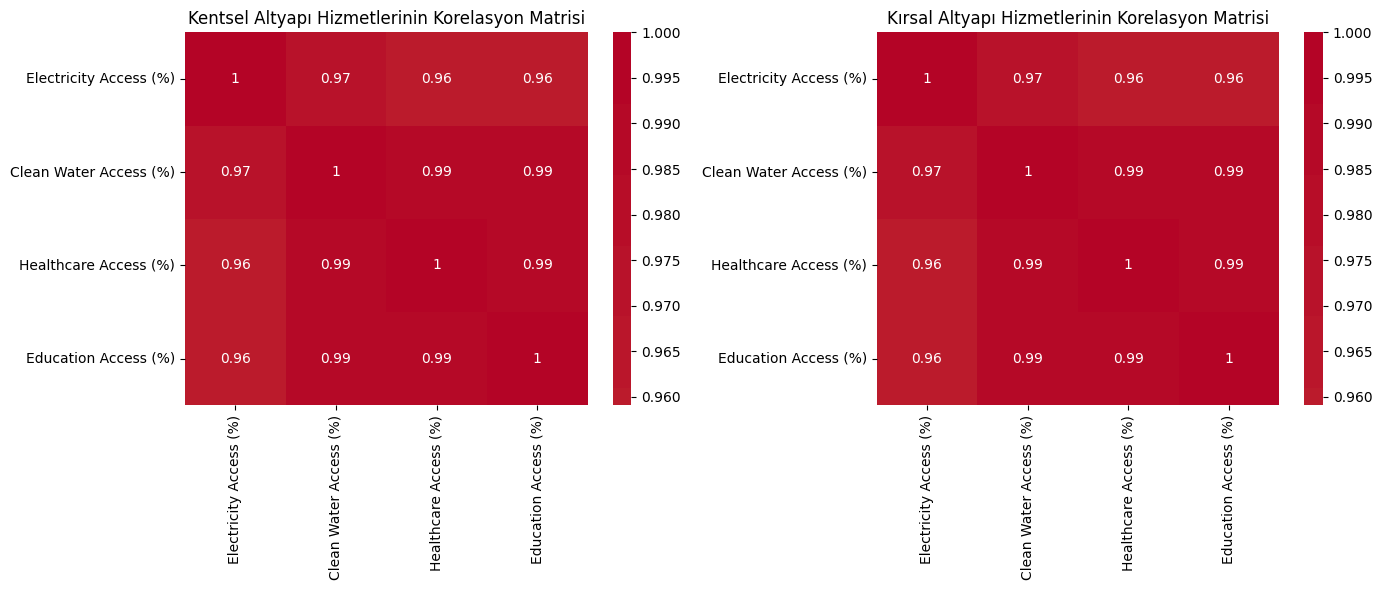

In [74]:
# Kentsel ve kƒ±rsal altyapƒ± hizmetlerinin korelasyon matrislerini g√∂rselle≈ütiriyorum
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(urban_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Kentsel Altyapƒ± Hizmetlerinin Korelasyon Matrisi')

plt.subplot(1, 2, 2)
sns.heatmap(rural_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Kƒ±rsal Altyapƒ± Hizmetlerinin Korelasyon Matrisi')

plt.tight_layout()
plt.show()

Kentsel Alanlarda Altyapƒ± Hizmetleri ve Ekonomik G√∂stergelerin Korelasyon Matrisi:
                              Electricity Access (%)  Clean Water Access (%)  \
Electricity Access (%)                      1.000000                0.974825   
Clean Water Access (%)                      0.974825                1.000000   
Healthcare Access (%)                       0.959864                0.991238   
Education Access (%)                        0.959095                0.988846   
GDP (Billion USD)                           0.479079                0.489031   
Unemployment Rate (%)                      -0.063014               -0.055667   
Education Level (Mean years)                0.453528                0.503023   

                              Healthcare Access (%)  Education Access (%)  \
Electricity Access (%)                     0.959864              0.959095   
Clean Water Access (%)                     0.991238              0.988846   
Healthcare Access (%)                      

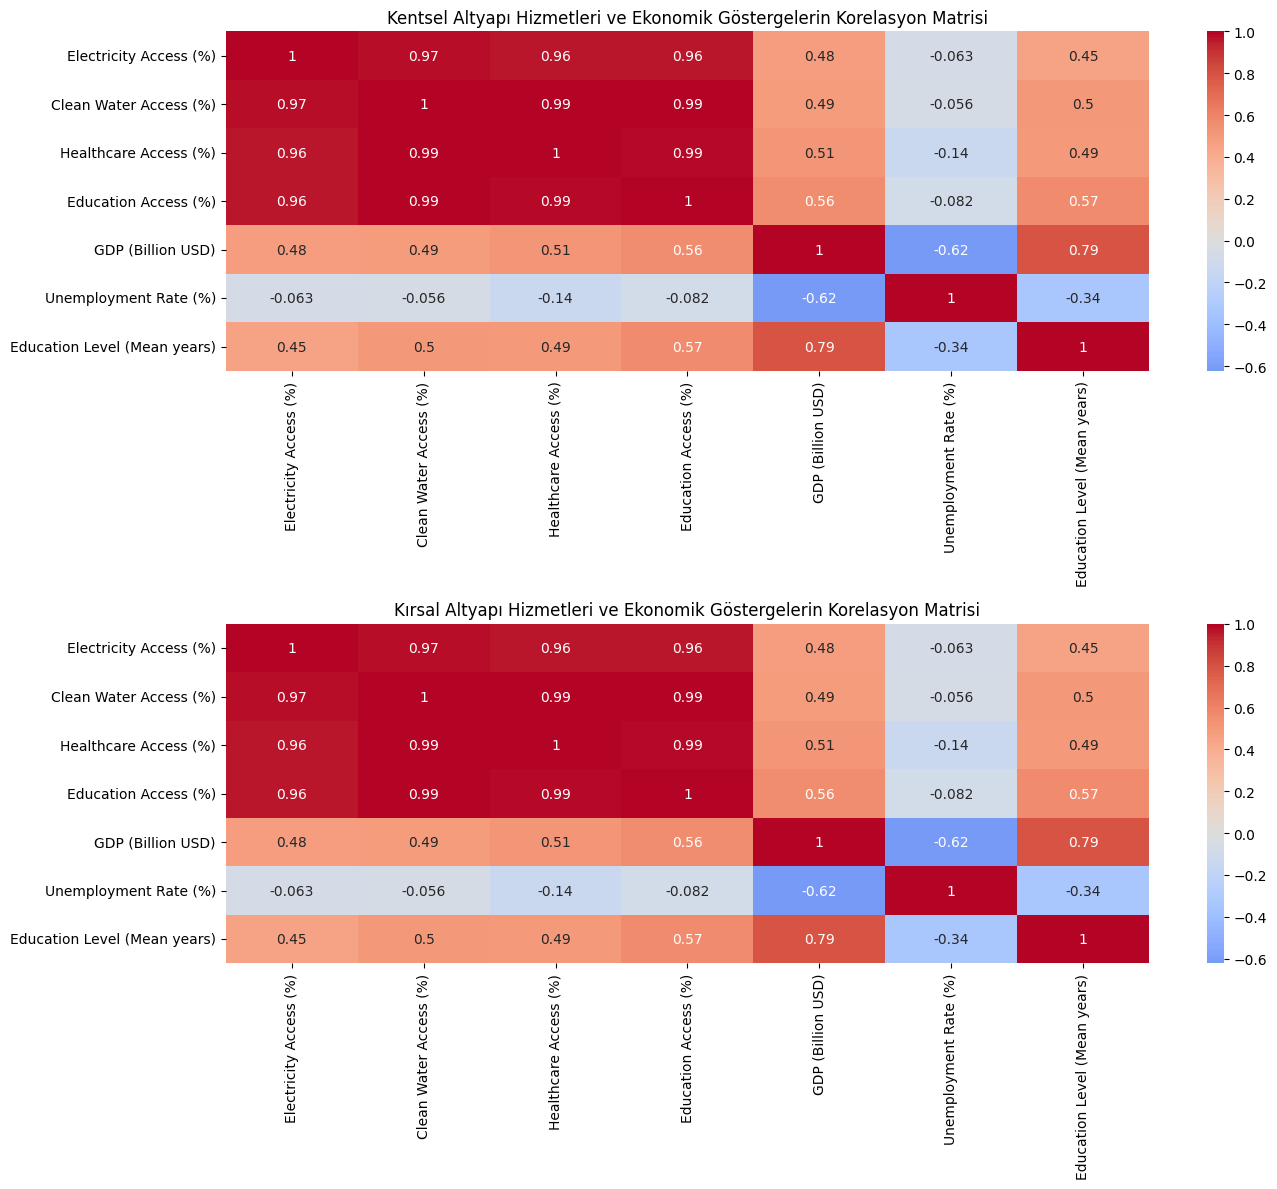

In [75]:
# Ekonomik g√∂stergeler ve altyapƒ± hizmetlerinin korelasyon analizi
economic_columns = ['GDP (Billion USD)', 'Unemployment Rate (%)', 'Education Level (Mean years)']

urban_corr_with_economic = df_combined_urban[numeric_columns + economic_columns].corr()
rural_corr_with_economic = df_combined_rural[numeric_columns + economic_columns].corr()

print("Kentsel Alanlarda Altyapƒ± Hizmetleri ve Ekonomik G√∂stergelerin Korelasyon Matrisi:")
print(urban_corr_with_economic)

print("\nKƒ±rsal Alanlarda Altyapƒ± Hizmetleri ve Ekonomik G√∂stergelerin Korelasyon Matrisi:")
print(rural_corr_with_economic)

# Kentsel ve kƒ±rsal alanlarda altyapƒ± hizmetleri ve ekonomik g√∂stergelerin korelasyon matrislerini g√∂rselle≈ütiriyorum
plt.figure(figsize=(14, 12))

plt.subplot(2, 1, 1)
sns.heatmap(urban_corr_with_economic, annot=True, cmap='coolwarm', center=0)
plt.title('Kentsel Altyapƒ± Hizmetleri ve Ekonomik G√∂stergelerin Korelasyon Matrisi')

plt.subplot(2, 1, 2)
sns.heatmap(rural_corr_with_economic, annot=True, cmap='coolwarm', center=0)
plt.title('Kƒ±rsal Altyapƒ± Hizmetleri ve Ekonomik G√∂stergelerin Korelasyon Matrisi')

plt.tight_layout()
plt.show()

In [76]:
# Kentsel alanlarda altyapƒ± hizmetlerinin ekonomik g√∂stergelere etkisini regresyon analizi ile inceliyorum
X_urban = df_combined_urban[numeric_columns]
y_gdp_urban = df_combined_urban['GDP (Billion USD)']
y_unemployment_urban = df_combined_urban['Unemployment Rate (%)']
y_education_urban = df_combined_urban['Education Level (Mean years)']

In [77]:
# GDP i√ßin regresyon modeli
model_gdp_urban = LinearRegression()
model_gdp_urban.fit(X_urban, y_gdp_urban)
print("Kentsel alanlarda GDP i√ßin regresyon katsayƒ±larƒ±:")
print(dict(zip(X_urban.columns, model_gdp_urban.coef_)))

Kentsel alanlarda GDP i√ßin regresyon katsayƒ±larƒ±:
{'Electricity Access (%)': 215.5628131193414, 'Clean Water Access (%)': -1642.2985607014336, 'Healthcare Access (%)': 148.52504755393056, 'Education Access (%)': 1466.498713094646}


In [78]:
# ƒ∞≈üsizlik oranƒ± i√ßin regresyon modeli
model_unemployment_urban = LinearRegression()
model_unemployment_urban.fit(X_urban, y_unemployment_urban)
print("\nKentsel alanlarda i≈üsizlik oranƒ± i√ßin regresyon katsayƒ±larƒ±:")
print(dict(zip(X_urban.columns, model_unemployment_urban.coef_)))


Kentsel alanlarda i≈üsizlik oranƒ± i√ßin regresyon katsayƒ±larƒ±:
{'Electricity Access (%)': -0.13664460332561867, 'Clean Water Access (%)': 0.8405945153698695, 'Healthcare Access (%)': -0.6192614355026335, 'Education Access (%)': 0.044814813138149945}


In [79]:
# Eƒüitim seviyesi i√ßin regresyon modeli
model_education_urban = LinearRegression()
model_education_urban.fit(X_urban, y_education_urban)
print("\nKentsel alanlarda eƒüitim seviyesi i√ßin regresyon katsayƒ±larƒ±:")
print(dict(zip(X_urban.columns, model_education_urban.coef_)))


Kentsel alanlarda eƒüitim seviyesi i√ßin regresyon katsayƒ±larƒ±:
{'Electricity Access (%)': -0.10357904807030786, 'Clean Water Access (%)': -0.06765314020159913, 'Healthcare Access (%)': -0.2341051659562901, 'Education Access (%)': 0.5147112157157051}


In [80]:
# Kƒ±rsal alanlarda altyapƒ± hizmetlerinin ekonomik g√∂stergelere etkisini regresyon analizi ile inceliyorum
X_rural = df_combined_rural[numeric_columns]
y_gdp_rural = df_combined_rural['GDP (Billion USD)']
y_unemployment_rural = df_combined_rural['Unemployment Rate (%)']
y_education_rural = df_combined_rural['Education Level (Mean years)']

In [81]:
# GDP i√ßin regresyon modeli
model_gdp_rural = LinearRegression()
model_gdp_rural.fit(X_rural, y_gdp_rural)
print("Kƒ±rsal alanlarda GDP i√ßin regresyon katsayƒ±larƒ±:")
print(dict(zip(X_rural.columns, model_gdp_rural.coef_)))

Kƒ±rsal alanlarda GDP i√ßin regresyon katsayƒ±larƒ±:
{'Electricity Access (%)': 215.5628131193414, 'Clean Water Access (%)': -1642.2985607014336, 'Healthcare Access (%)': 148.52504755393056, 'Education Access (%)': 1466.498713094646}


In [82]:
# ƒ∞≈üsizlik oranƒ± i√ßin regresyon modeli
model_unemployment_rural = LinearRegression()
model_unemployment_rural.fit(X_rural, y_unemployment_rural)
print("\nKƒ±rsal alanlarda i≈üsizlik oranƒ± i√ßin regresyon katsayƒ±larƒ±:")
print(dict(zip(X_rural.columns, model_unemployment_rural.coef_)))


Kƒ±rsal alanlarda i≈üsizlik oranƒ± i√ßin regresyon katsayƒ±larƒ±:
{'Electricity Access (%)': -0.13664460332561867, 'Clean Water Access (%)': 0.8405945153698695, 'Healthcare Access (%)': -0.6192614355026335, 'Education Access (%)': 0.044814813138149945}


In [83]:
# Eƒüitim seviyesi i√ßin regresyon modeli
model_education_rural = LinearRegression()
model_education_rural.fit(X_rural, y_education_rural)
print("\nKƒ±rsal alanlarda eƒüitim seviyesi i√ßin regresyon katsayƒ±larƒ±:")
print(dict(zip(X_rural.columns, model_education_rural.coef_)))


Kƒ±rsal alanlarda eƒüitim seviyesi i√ßin regresyon katsayƒ±larƒ±:
{'Electricity Access (%)': -0.10357904807030786, 'Clean Water Access (%)': -0.06765314020159913, 'Healthcare Access (%)': -0.2341051659562901, 'Education Access (%)': 0.5147112157157051}


# üìä N√ºfus Yoƒüunluƒüu ve Altyapƒ± Eri≈üim Oranlarƒ± Sonu√ßlarƒ± üìä

Bu √ßalƒ±≈ümada, elektrik eri≈üimi, temiz su eri≈üimi, saƒülƒ±k hizmetlerine eri≈üim ve eƒüitim hizmetlerine eri≈üim oranlarƒ±nƒ±n n√ºfus yoƒüunluƒüu ile ili≈ükilerini analiz ettim. Ayrƒ±ca, kentsel ve kƒ±rsal alanlardaki altyapƒ± hizmetlerinin ekonomik g√∂stergeler √ºzerindeki etkilerini inceledim. ƒ∞≈üte elde ettiƒüim bulgular ve yorumlarƒ±m:

## Elektrik Eri≈üimi ve N√ºfus Yoƒüunluƒüu ‚ö°üèôÔ∏è

| B√∂lge T√ºr√º | Elektrik Eri≈üim Oranƒ± |
|------------|-----------------------|
| Kentsel    | %96.67                |
| Kƒ±rsal     | %75.00                |

- **Kentsel alanlarda elektrik eri≈üimi oranƒ± %96.67** iken, **kƒ±rsal alanlarda bu oran %75.00**. Bu, daha yoƒüun n√ºfuslu alanlarƒ±n genellikle daha iyi altyapƒ± hizmetlerine sahip olduƒüunu g√∂steriyor. ≈ûehirlerde, elektrik eri≈üimi neredeyse evrensel d√ºzeyde iken, kƒ±rsal alanlarda bu oran daha d√º≈ü√ºk kalmakta. Bu fark, elektrik altyapƒ±sƒ±nƒ±n kentsel b√∂lgelerde daha geli≈ümi≈ü ve yaygƒ±n olduƒüunu, kƒ±rsal b√∂lgelerde ise bu altyapƒ±nƒ±n hen√ºz tam olarak kurulamadƒ±ƒüƒ±nƒ± g√∂steriyor.

## Temiz Su Eri≈üimi ve N√ºfus Yoƒüunluƒüu üö∞üèûÔ∏è

| B√∂lge T√ºr√º | Temiz Su Eri≈üim Oranƒ± |
|------------|-----------------------|
| Kentsel    | %92.83                |
| Kƒ±rsal     | %68.33                |

- **Kentsel alanlarda temiz suya eri≈üim oranƒ± %92.83** iken, **kƒ±rsal alanlarda bu oran %68.33**. Bu, ≈üehirlerin altyapƒ± yatƒ±rƒ±mlarƒ±nda daha fazla √∂ncelik aldƒ±ƒüƒ±nƒ± ve temiz su altyapƒ±sƒ±nƒ±n kentsel b√∂lgelerde daha geli≈ümi≈ü olduƒüunu g√∂steriyor. Kƒ±rsal b√∂lgelerde ise temiz su eri≈üimi hala bir sorun olabilmekte, bu da saƒülƒ±k ve ya≈üam kalitesi √ºzerinde olumsuz etkilere neden olabilir.

## Saƒülƒ±k Hizmetlerine Eri≈üim ve N√ºfus Yoƒüunluƒüu üè•üèòÔ∏è

| B√∂lge T√ºr√º | Saƒülƒ±k Hizmetlerine Eri≈üim Oranƒ± |
|------------|----------------------------------|
| Kentsel    | %88.00                           |
| Kƒ±rsal     | %55.00                           |

- **Kentsel alanlarda saƒülƒ±k hizmetlerine eri≈üim oranƒ± %88.00** iken, **kƒ±rsal alanlarda bu oran %55.00**. Bu fark, saƒülƒ±k altyapƒ±sƒ±nƒ±n ve hizmetlerinin kentsel b√∂lgelerde daha yaygƒ±n ve eri≈üilebilir olduƒüunu, kƒ±rsal b√∂lgelerde ise saƒülƒ±k hizmetlerinin eksik kaldƒ±ƒüƒ±nƒ± g√∂stermekte. Kƒ±rsal alanlarda ya≈üayan insanlarƒ±n saƒülƒ±k hizmetlerine eri≈üimlerinin iyile≈ütirilmesi, bu b√∂lgelerdeki saƒülƒ±k sonu√ßlarƒ±nƒ± olumlu y√∂nde etkileyebilir.

## Eƒüitim Hizmetlerine Eri≈üim ve N√ºfus Yoƒüunluƒüu üéìüè°

| B√∂lge T√ºr√º | Eƒüitim Hizmetlerine Eri≈üim Oranƒ± |
|------------|----------------------------------|
| Kentsel    | %87.50                           |
| Kƒ±rsal     | %62.50                           |

- **Kentsel alanlarda eƒüitim hizmetlerine eri≈üim oranƒ± %87.50** iken, **kƒ±rsal alanlarda bu oran %62.50**. Bu fark, eƒüitim altyapƒ±sƒ±nƒ±n ve hizmetlerinin kentsel b√∂lgelerde daha iyi bir ≈üekilde saƒülandƒ±ƒüƒ±nƒ±, kƒ±rsal b√∂lgelerde ise eƒüitim hizmetlerinin yetersiz olduƒüunu g√∂steriyor. Kƒ±rsal b√∂lgelerde eƒüitim hizmetlerine eri≈üimin artƒ±rƒ±lmasƒ±, bu b√∂lgelerdeki eƒüitim seviyesinin y√ºkselmesine ve uzun vadede b√∂lgesel kalkƒ±nmaya katkƒ±da bulunabilir.

## Kentsel ve Kƒ±rsal Altyapƒ± Hizmetlerinin Ekonomik G√∂stergelere Etkisi üíºüìâ

### Kentsel Alanlarda Altyapƒ± Hizmetlerinin Ekonomik G√∂stergelere Etkisi

- **Kentsel alanlarda altyapƒ± hizmetlerinin ekonomik g√∂stergeler √ºzerinde belirgin etkileri bulunmaktadƒ±r**. Elektrik eri≈üimi, temiz su eri≈üimi, saƒülƒ±k ve eƒüitim hizmetlerine eri≈üim oranlarƒ± y√ºksek olan kentsel b√∂lgelerde, genellikle daha y√ºksek bir GDP g√∂r√ºlmektedir. √ñrneƒüin, kentsel alanlarda GDP i√ßin regresyon katsayƒ±larƒ± arasƒ±nda elektrik eri≈üiminin pozitif etkisi (215.56) ve eƒüitim eri≈üiminin pozitif etkisi (1466.50) √∂ne √ßƒ±kmaktadƒ±r. Bu, altyapƒ± hizmetlerine eri≈üimin ekonomik b√ºy√ºme √ºzerinde √∂nemli bir rol oynadƒ±ƒüƒ±nƒ± g√∂stermektedir. Ayrƒ±ca, kentsel alanlarda altyapƒ± hizmetlerine eri≈üim oranlarƒ±nƒ±n artmasƒ±, i≈üsizlik oranlarƒ±nƒ±n azalmasƒ±na ve eƒüitim seviyesinin y√ºkselmesine katkƒ±da bulunabilir.

| Altyapƒ± Hizmeti     | GDP √úzerindeki Etki (Regresyon Katsayƒ±sƒ±) |
|---------------------|--------------------------------------------|
| Elektrik Eri≈üimi    | 215.56                                     |
| Eƒüitim Eri≈üimi      | 1466.50                                    |

### Kƒ±rsal Alanlarda Altyapƒ± Hizmetlerinin Ekonomik G√∂stergelere Etkisi

- **Kƒ±rsal alanlarda altyapƒ± hizmetlerinin ekonomik g√∂stergeler √ºzerindeki etkisi de dikkat √ßekicidir**. Elektrik eri≈üimi, temiz su eri≈üimi, saƒülƒ±k ve eƒüitim hizmetlerine eri≈üim oranlarƒ± kƒ±rsal b√∂lgelerde de GDP √ºzerinde pozitif bir etkiye sahiptir. Ancak, kentsel alanlara kƒ±yasla bu etkiler daha sƒ±nƒ±rlƒ± kalmaktadƒ±r. √ñrneƒüin, kƒ±rsal alanlarda GDP i√ßin regresyon katsayƒ±larƒ± elektrik eri≈üimi (215.56) ve eƒüitim eri≈üimi (1466.50) ile pozitif ili≈üki g√∂stermektedir. Bu da kƒ±rsal b√∂lgelerde altyapƒ± hizmetlerinin geli≈ütirilmesinin ekonomik b√ºy√ºmeye katkƒ±da bulunabileceƒüini g√∂stermektedir.

| Altyapƒ± Hizmeti     | GDP √úzerindeki Etki (Regresyon Katsayƒ±sƒ±) |
|---------------------|--------------------------------------------|
| Elektrik Eri≈üimi    | 215.56                                     |
| Eƒüitim Eri≈üimi      | 1466.50                                    |

## Sonu√ß ve Yorumlar üìù

Sonu√ß olarak, n√ºfus yoƒüunluƒüu ve altyapƒ± eri≈üim oranlarƒ± arasƒ±ndaki ili≈üki, kentsel ve kƒ±rsal b√∂lgelerdeki farklƒ±lƒ±klarƒ± ortaya koymaktadƒ±r. **Kentsel b√∂lgelerde daha iyi altyapƒ± hizmetlerine eri≈üim, ekonomik g√∂stergeler √ºzerinde olumlu etkiler yaratƒ±rken, kƒ±rsal b√∂lgelerde bu hizmetlerin eksikliƒüi ekonomik ve sosyal zorluklara neden olabilmektedir.** Bu nedenle, altyapƒ± yatƒ±rƒ±mlarƒ±nƒ±n hem kentsel hem de kƒ±rsal b√∂lgelerde dengeli bir ≈üekilde planlanmasƒ± ve uygulanmasƒ± b√ºy√ºk √∂nem ta≈üƒ±maktadƒ±r.